In [1]:
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
from matplotlib.pyplot import figure
import numpy as np
import cartopy.feature as cfeature
import pyproj
import utm
import pandas as pd 
import traceback 
from pathlib import Path  
from mpl_toolkits.basemap import Basemap
import metpy.calc as mpcalc
from metpy.units import units
import os  
import numpy.ma as ma
import netCDF4 as nc
import glob
import datetime as dt
#from netCDF4 import date2num,num2date

In [2]:
#Open HYCOM 25
ds_25 = xr.open_mfdataset('/Users/Anna/Desktop/MSMET/Thesis/WRFprepData/March2018HYCOM/020_archv.2018_084_*_3z.nc')#, combine = 'by_coords', concat_dim = 'time')
ds_25.to_netcdf('test_25.nc')
ds25 = xr.open_dataset('test_25.nc')

#WRFIN_D03
wrfinput_d03 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/wrfinput_d03')


In [3]:
old_d03_SST = wrfinput_d03.SST.values-273.15
old_d03_UOCE = wrfinput_d03.UOCE.values
old_d03_VOCE = wrfinput_d03.VOCE.values
XLAT = wrfinput_d03.XLAT.values
XLON = wrfinput_d03.XLONG.values

print('XLAT: ', XLAT.shape, '\nXLON: ', XLON.shape )
print('Max lat: ', np.max(XLAT), '\Min lat: ', np.min(XLAT))
print('Max lon: ', np.max(XLON), '\Min lon: ', np.min(XLON))
print ('d03_UOCE: ',old_d03_UOCE.shape, '\nd03_VOCE: ',  old_d03_VOCE.shape, '\nd03_SST: ', old_d03_SST.shape)

print('\n\n LAT: ', XLAT)
print('\n\n LON: ', XLON)

XLAT:  (1, 474, 639) 
XLON:  (1, 474, 639)
Max lat:  28.640232 \Min lat:  24.351265
Max lon:  -86.96835 \Min lon:  -93.500946
d03_UOCE:  (1, 474, 639) 
d03_VOCE:  (1, 474, 639) 
d03_SST:  (1, 474, 639)


 LAT:  [[[24.351944 24.352158 24.352379 ... 24.351715 24.351501 24.351265]
  [24.360924 24.361137 24.361351 ... 24.360687 24.360466 24.360252]
  [24.369919 24.370125 24.370338 ... 24.369705 24.369476 24.369255]
  ...
  [28.586124 28.586365 28.58659  ... 28.585907 28.585674 28.58545 ]
  [28.595127 28.59534  28.59557  ... 28.594894 28.594662 28.594429]
  [28.604115 28.604328 28.604568 ... 28.603882 28.603653 28.60342 ]]]


 LON:  [[[-93.38281  -93.372955 -93.3631   ... -87.10733  -87.09747  -87.087585]
  [-93.38306  -93.37317  -93.36334  ... -87.107086 -87.09723  -87.08734 ]
  [-93.3833   -93.37341  -93.363556 ... -87.10684  -87.096985 -87.08713 ]
  ...
  [-93.50043  -93.490204 -93.47995  ... -86.98935  -86.979126 -86.96887 ]
  [-93.50067  -93.49045  -93.480225 ... -86.989075 -86.97885  

In [4]:
#REAL RUN 
latbounds = [24, 29]
lonbounds = [-95, -87]

#TEST RUN
#latbounds = [25, 26]
#lonbounds = [-89, -88]

lats = ds25.Latitude.values[:]
lons = ds25.Longitude.values[:]

#set upper & lower bounds
latli = np.argmin(np.abs(lats-latbounds[0]))
latui = np.argmin(np.abs(lats-latbounds[1]))
lonli = np.argmin(np.abs(lons-lonbounds[0]))
lonui = np.argmin(np.abs(lons-lonbounds[1]))

lat_array=ds25.Latitude.values[latli:latui]
lon_array=ds25.Longitude.values[lonli:lonui]
u_subset_25=ds25.variables['u'][:,0,latli:latui, lonli:lonui]
meanU_25 = u_subset_25.mean('MT')
#meanU_25=meanU_25*0.54 - 0.19
meanU_25=meanU_25*0.75-0.15

#v current
v_subset_25=ds25.variables['v'][:,0,latli:latui, lonli:lonui]
meanV_25 = v_subset_25.mean('MT')
meanV_25=meanV_25*0.27+0.78
#meanV_25=meanV_25

#SST
SST_subset_25=ds25.variables['water_temp'][:,0,latli:latui, lonli:lonui]
meanSST_25 = SST_subset_25.mean('MT')


In [5]:
#March 25 Dopplerscat
#ds25_1 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0036-0111_line01.L2.nc')
#ds25_2 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0119-0174_line02.L2.nc')
#ds25_3 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0189-0236_line03.L2.nc')
#ds25_4 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0249-0312_line04.L2.nc')
ds25_5 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0326-0368_line05.L2.nc')
ds25_6 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0380-0436_line06.L2.nc')
ds25_7 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0450-0490_line07.L2.nc')
#ds25_8 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0504-0552_line08.L2.nc')
#ds25_9 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0565-0602_line09.L2.nc')
#ds25_10 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0609-0696_line10.L2.nc')

In [6]:
print(ds25_5.variables)

Frozen({'x': <xarray.IndexVariable 'x' (x: 589)>
array([-10139186.172152, -10138885.842025, -10138585.511897, ...,
        -9963192.717577,  -9962892.387449,  -9962592.057322])
Attributes:
    long_name:              Web Mercator easting
    units:                  m
    valid_min:              -1000000.0
    valid_max:              1000000.0
    coverage_content_type:  coordinate, 'y': <xarray.IndexVariable 'y' (y: 118)>
array([3059692.211047, 3059993.982294, 3060295.75354 , 3060597.524786,
       3060899.296032, 3061201.067278, 3061502.838524, 3061804.60977 ,
       3062106.381017, 3062408.152263, 3062709.923509, 3063011.694755,
       3063313.466001, 3063615.237247, 3063917.008493, 3064218.779739,
       3064520.550986, 3064822.322232, 3065124.093478, 3065425.864724,
       3065727.63597 , 3066029.407216, 3066331.178462, 3066632.949709,
       3066934.720955, 3067236.492201, 3067538.263447, 3067840.034693,
       3068141.805939, 3068443.577185, 3068745.348431, 3069047.119678,
      

In [6]:
#set other DS variables 

lat25_5=ds25_5.latitude.values
lon25_5=ds25_5.longitude.values
flag25_5=ds25_5.flag.values
u_cur25_5=ds25_5.u_current.values

lat25_6=ds25_6.latitude.values
lon25_6=ds25_6.longitude.values
flag25_6=ds25_6.flag.values
u_cur25_6=ds25_6.u_current.values

lat25_7=ds25_7.latitude.values
lon25_7=ds25_7.longitude.values
flag25_7=ds25_7.flag.values
u_cur25_7=ds25_7.u_current.values

#v current
v_cur25_5=ds25_5.v_current.values
v_cur25_6=ds25_6.v_current.values
v_cur25_7=ds25_7.v_current.values


In [7]:
#Apply Error Flag 
#0 is good, 2 is bad
#set flag to only accept 0
   
lonlen25_5=len(lon25_5)
latlen25_5=len(lat25_5)
goodUarr25_5=np.zeros((latlen25_5,lonlen25_5))
goodUarr25_5[:]=np.nan
goodVarr25_5=np.zeros((latlen25_5,lonlen25_5))
goodVarr25_5[:]=np.nan
for x in range (len(lon25_5)):
    for y in range (len(lat25_5)):
        if flag25_5[y,x] == 0:
            goodUarr25_5[y,x] = u_cur25_5[y,x] 
            goodVarr25_5[y,x] = v_cur25_5[y,x] 
            
lonlen25_6=len(lon25_6)
latlen25_6=len(lat25_6)
goodUarr25_6=np.zeros((latlen25_6,lonlen25_6))
goodUarr25_6[:]=np.nan
goodVarr25_6=np.zeros((latlen25_6,lonlen25_6))
goodVarr25_6[:]=np.nan
for x in range (len(lon25_6)):
    for y in range (len(lat25_6)):
        if flag25_6[y,x] == 0:
            goodUarr25_6[y,x] = u_cur25_6[y,x] 
            goodVarr25_6[y,x] = v_cur25_6[y,x] 
            
lonlen25_7=len(lon25_7)
latlen25_7=len(lat25_7)
goodUarr25_7=np.zeros((latlen25_7,lonlen25_7))
goodUarr25_7[:]=np.nan
goodVarr25_7=np.zeros((latlen25_7,lonlen25_7))
goodVarr25_7[:]=np.nan
for x in range (len(lon25_7)):
    for y in range (len(lat25_7)):
        if flag25_7[y,x] == 0:
            goodUarr25_7[y,x] = u_cur25_7[y,x] 
            goodVarr25_7[y,x] = v_cur25_7[y,x] 


In [8]:
#Gaussian Filter U25
HYCOM_lat = lat_array
HYCOM_lon = lon_array

#Define new grid: 1km (1000m)
#match WRF refernce lat/lon, increment by partial degree 
###### !!!!! wrf lat lon NEED TO UPDATE THESE !!!!! ######

#REAL CASE: 
#lat_0 =  24.5
#lat_0 =24.147293
#lon_0 = -93
#lon_0 = -93.42328
#lat_max = 28.5
#lat_max = 28.72953
#lon_max = -87.5
#lon_max = -88.10474

#TEST CASE: DS Domain
#lat_0 =  26.45
#lon_0 = -90.9
#lat_max = 27.15
#lon_max = -89.65 

#TEST CASE mini
#lat_0 =  26.75
#lon_0 = -90.25
#lat_max = 27.25
#lon_max = -89.75 

#min, max, then increment and fill lat & then lon (Y=lat, X=lon)
#WRF_lat = np.arange(lat_0, lat_max, 0.00898315)
#WRF_lon = np.arange(lon_0, lon_max, 0.00898315)
#WRF_latLen = len(WRF_lat)
#WRF_lonLen = len(WRF_lon)

#REAL RUN 1 
WRF_lat = XLAT[0,:,0]
WRF_lon = XLON[0,0,:]
WRF_latLen = len(WRF_lat)
WRF_lonLen = len(WRF_lon)

#REAL RUN 2 
#WRF_lat = wrf2_lat
#WRF_lon = wrf2_lon
#WRF_latLen = len(WRF_lat)
#WRF_lonLen = len(WRF_lon)

#make current arrays (u & v) that match lat & lon dimensions, fill with nans 
u25_WRF  = np.zeros((WRF_latLen, WRF_lonLen))   
u25_WRF[:] = -999
DS_weightedU25 = u25_WRF*0
HYCOM_weightedU25 = u25_WRF*0

#at equator, 1deg = 111.31949077920639km, so 1km*(1deg/111.31949077920639km) = 0.00898315
#Great Circle Calculator 
#http://edwilliams.org/gccalc.htm

km_per_deg= 1/0.00898315
sigma_HYCOM = 0.02 #degrees  0.015*2 #For HYCOM 
sigma_HYCOM_km = sigma_HYCOM*km_per_deg
sigma_DS = 1.0 #0.5-1.0 #km 
#sigma_DS_km = sigma_DS*km_per_deg
sigma_DS_km = sigma_DS

for y in range (0, WRF_latLen):  
#for y in range (0, len(WRF_lat)):  
    #print(' y :', y)
    for x in range (0, WRF_lonLen):
    #for x in range (0, len(WRF_lon)):
        #print('x:', x)
        sum_weight_HYCOM = 0
        sum_product_u25HYCOM = 0

        sum_weight_DS25u5 = 0
        sum_product_u25DS5 = 0
        sum_weight_DS25u6 = 0
        sum_product_u25DS6 = 0
        sum_weight_DS25u7 = 0
        sum_product_u25DS7 = 0
       
        #define area of weighting (lat,lon point +- 3 sigma in lat/lon but round up)
        #+- half size 
        #set bounds in lat/lon
        min_lon = max(WRF_lon[x] - 3*sigma_HYCOM, WRF_lon[0])
        max_lon = min(WRF_lon[x] + 3*sigma_HYCOM, WRF_lon[WRF_lonLen -1])
        min_lat = max(WRF_lat[y] - 3*sigma_HYCOM, WRF_lat[0])   
        max_lat = min(WRF_lat[y] + 3*sigma_HYCOM, WRF_lat[WRF_latLen -1])  
        #min_lon = max(WRF_lon[x] - 3*sigma_HYCOM, np.min(wrf1_lon)) 
        #max_lon = min(WRF_lon[x] + 3*sigma_HYCOM, WRF_lon[WRF_lonLen -1])
        #min_lat = max(WRF_lat[y] - 3*sigma_HYCOM, np.min(wrf1_lat))   
        #max_lat = min(WRF_lat[y] + 3*sigma_HYCOM, WRF_lat[WRF_latLen -1]) 

        good_lon = [] 
        good_lat = []
        inter_like = []
        
        #HYCOM lat/lon comparison 
        test1_In = np.where(HYCOM_lon >= min_lon)
        test2_In = np.where(HYCOM_lon <= max_lon)
        inter_like_lon = np.intersect1d(test1_In, test2_In)
        
        test1_In = np.where(HYCOM_lat >= min_lat)
        test2_In = np.where(HYCOM_lat <= max_lat)
        inter_like_lat = np.intersect1d(test1_In, test2_In)   
        
        #DS lat/lon comparison

        DS25u5_test1_In = np.where(lon25_5 >= min_lon)
        DS25u5_test2_In = np.where(lon25_5 <= max_lon)
        DS25u5_inter_like_lon = np.intersect1d(DS25u5_test1_In, DS25u5_test2_In)
        DS25u5_test1_In = np.where(lat25_5 >= min_lat)
        DS25u5_test2_In = np.where(lat25_5 <= max_lat)
        DS25u5_inter_like_lat = np.intersect1d(DS25u5_test1_In, DS25u5_test2_In) 
        
        DS25u6_test1_In = np.where(lon25_6 >= min_lon)
        DS25u6_test2_In = np.where(lon25_6 <= max_lon)
        DS25u6_inter_like_lon = np.intersect1d(DS25u6_test1_In, DS25u6_test2_In)
        DS25u6_test1_In = np.where(lat25_6 >= min_lat)
        DS25u6_test2_In = np.where(lat25_6 <= max_lat)
        DS25u6_inter_like_lat = np.intersect1d(DS25u6_test1_In, DS25u6_test2_In) 

        DS25u7_test1_In = np.where(lon25_7 >= min_lon)
        DS25u7_test2_In = np.where(lon25_7 <= max_lon)
        DS25u7_inter_like_lon = np.intersect1d(DS25u7_test1_In, DS25u7_test2_In)
        DS25u7_test1_In = np.where(lat25_7 >= min_lat)
        DS25u7_test2_In = np.where(lat25_7 <= max_lat)
        DS25u7_inter_like_lat = np.intersect1d(DS25u7_test1_In, DS25u7_test2_In)

        #HYCOM index
        lon_indices = inter_like_lon
        lat_indices = inter_like_lat
        
        #DS index     
        DS25u5_lon_indices =  DS25u5_inter_like_lon
        DS25u5_lat_indices =  DS25u5_inter_like_lat
        DS25u6_lon_indices =  DS25u6_inter_like_lon
        DS25u6_lat_indices =  DS25u6_inter_like_lat
        DS25u7_lon_indices =  DS25u7_inter_like_lon
        DS25u7_lat_indices =  DS25u7_inter_like_lat
        
        #Good HYCOM index
        good_lon = HYCOM_lon[lon_indices]
        good_lat = HYCOM_lat[lat_indices]    
        
        #Good DS index
        DS25u5_good_lon = lon25_5[DS25u5_lon_indices]
        DS25u5_good_lat = lat25_5[DS25u5_lat_indices] 
        DS25u6_good_lon = lon25_6[DS25u6_lon_indices]
        DS25u6_good_lat = lat25_6[DS25u6_lat_indices] 
        DS25u7_good_lon = lon25_7[DS25u7_lon_indices]
        DS25u7_good_lat = lat25_7[DS25u7_lat_indices] 
    
        #get lengths of good arrays HYCOM 
        good_lon_len = len(good_lon)
        good_lat_len = len(good_lat)
        
        #DS length of food arrays 
        DS25u5_good_lon_len = len(DS25u5_good_lon)
        DS25u5_good_lat_len = len(DS25u5_good_lat) 
        DS25u6_good_lon_len = len(DS25u6_good_lon)
        DS25u6_good_lat_len = len(DS25u6_good_lat)  
        DS25u7_good_lon_len = len(DS25u7_good_lon)
        DS25u7_good_lat_len = len(DS25u7_good_lat)      
        
        #loop through values of good HYCOM arrays 
        for y_small in range(0, good_lat_len):
            for x_small in range(0, good_lon_len):         
                
                #calcualte the distance, 1km  
                #HYCOM distance 
                distance=(km_per_deg)*np.sqrt((good_lat[y_small]-WRF_lat[y])**2+((good_lon[x_small]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                
                #determine weights- get an array of poitns of the smaller domain
                if distance <= 3 * sigma_HYCOM_km: 
                #if distance <= 3 * sigma_HYCOM: 
                    #weight_HYCOM = 0.2*(1 / (sigma_HYCOM_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_HYCOM_km**2))
                    weight_HYCOM = 800*(1 / (sigma_HYCOM_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_HYCOM_km**2))
                    #weight_HYCOM = 0.2*(1 / (np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2))
                else: 
                    weight_HYCOM = 0 
                    
                #sum wieghts for HYCOM u & v
                sum_weight_HYCOM = sum_weight_HYCOM + weight_HYCOM

                #if sum of weights != 0, sum product of weights* current value for HYCOM                         
                sum_product_u25HYCOM = sum_product_u25HYCOM + weight_HYCOM * meanU_25[lat_indices[y_small], lon_indices[x_small]]
                #print('sum product HYCOM', sum_product_u25HYCOM)
                HYCOM_weightedU25[y,x] =  (sum_product_u25HYCOM/sum_weight_HYCOM)
        #print('sum product HYCOM', sum_product_u25HYCOM)
        #loop through values of good DS arrays 
         
        for y_small_DS25u5 in range(0, DS25u5_good_lat_len):
            for x_small_DS25u5 in range(0, DS25u5_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25u5_good_lat[y_small_DS25u5]-WRF_lat[y])**2+((DS25u5_good_lon[x_small_DS25u5]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr25_5[DS25u5_lat_indices[y_small_DS25u5], DS25u5_lon_indices[x_small_DS25u5]]): 
                    weight_DS25u5 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    #weight_DS25u5 = (1 / (np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2))
                    sum_weight_DS25u5 = sum_weight_DS25u5 + weight_DS25u5
                    sum_product_u25DS5 = sum_product_u25DS5 + weight_DS25u5 * goodUarr25_5[DS25u5_lat_indices[y_small_DS25u5], DS25u5_lon_indices[x_small_DS25u5]]
                    #print('sum_product_u25DS5: ', sum_product_u25DS5)
                else: 
                    weight_DS25u5 = 0 
                    
        for y_small_DS25u6 in range(0, DS25u6_good_lat_len):
            for x_small_DS25u6 in range(0, DS25u6_good_lon_len):          
                distance=(km_per_deg)*np.sqrt((DS25u6_good_lat[y_small_DS25u6]-WRF_lat[y])**2+((DS25u6_good_lon[x_small_DS25u6]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr25_6[DS25u6_lat_indices[y_small_DS25u6], DS25u6_lon_indices[x_small_DS25u6]]): 
                    weight_DS25u6 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    #weight_DS25u6 = (1 / (np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2))
                    sum_weight_DS25u6 = sum_weight_DS25u6 + weight_DS25u6
                    sum_product_u25DS6 = sum_product_u25DS6 + weight_DS25u6 * goodUarr25_6[DS25u6_lat_indices[y_small_DS25u6], DS25u6_lon_indices[x_small_DS25u6]]
                else: 
                    weight_DS25u6 = 0 
                    
        for y_small_DS25u7 in range(0, DS25u7_good_lat_len):
            for x_small_DS25u7 in range(0, DS25u7_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25u7_good_lat[y_small_DS25u7]-WRF_lat[y])**2+((DS25u7_good_lon[x_small_DS25u7]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr25_7[DS25u7_lat_indices[y_small_DS25u7], DS25u7_lon_indices[x_small_DS25u7]]): 
                    weight_DS25u7 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    #weight_DS25u7 = (1 / (np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2))
                    sum_weight_DS25u7 = sum_weight_DS25u7 + weight_DS25u7
                    sum_product_u25DS7 = sum_product_u25DS7 + weight_DS25u7 * goodUarr25_7[DS25u7_lat_indices[y_small_DS25u7], DS25u7_lon_indices[x_small_DS25u7]]
                else: 
                    weight_DS25u7 = 0 
        #print('sum_product_DS: ', sum_product_u25DS5+sum_product_u25DS6+ sum_product_u25DS7)
            
    #outside of loop: sum of products/sum of weights
        DS_weight = (sum_weight_DS25u5 + sum_weight_DS25u6 + sum_weight_DS25u7) #add each DS sum, add ech sum weigth     
        if DS_weight != 0: 
            DS_weightedU25[y,x] =  (sum_product_u25DS5 + sum_product_u25DS6 + sum_product_u25DS7)/ DS_weight 
        else: 
            DS_weightedU25[y,x] = -999
            
        u25_WRF[y,x] = (sum_product_u25HYCOM + sum_product_u25DS5 + sum_product_u25DS6 + sum_product_u25DS7)/(sum_weight_HYCOM + sum_weight_DS25u5 + sum_weight_DS25u6 + sum_weight_DS25u7) #add each DS sum, add ech sum weigth 

#print('\nsigma DS:', sigma_DS)
#print('sigma HYCOM', sigma_HYCOM)

In [9]:
print(u25_WRF.shape) #<---- this the the UOCE for WRF 
print(WRF_lon.shape)
print(WRF_lat.shape)
print(u25_WRF)
print(DS_weightedU25.shape)
print(HYCOM_weightedU25.shape)

for x in u25_WRF: 
    for y in x: 
        if np.isnan(y):
            print('NaN present')
            
for x in u25_WRF: 
    for y in x: 
        if y == -999:
            print('-999 present')

(474, 639)
(639,)
(474,)
[[-0.03676818 -0.03676818 -0.03462522 ... -0.39933854 -0.39933854
  -0.39933854]
 [-0.03676818 -0.03574877 -0.03462471 ... -0.40015855 -0.39933854
  -0.39933854]
 [-0.03759319 -0.0365577  -0.03541112 ... -0.39922357 -0.39837169
  -0.39933854]
 ...
 [-0.05680274 -0.05675372 -0.05664098 ... -0.01681774 -0.01658411
  -0.01658411]
 [-0.05700583 -0.05694038 -0.05687633 ... -0.01609657 -0.01579646
  -0.01508605]
 [-0.057189   -0.05710773 -0.05702867 ... -0.01545005 -0.01508605
  -0.01508605]]
(474, 639)
(474, 639)


C:\Users\Anna\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


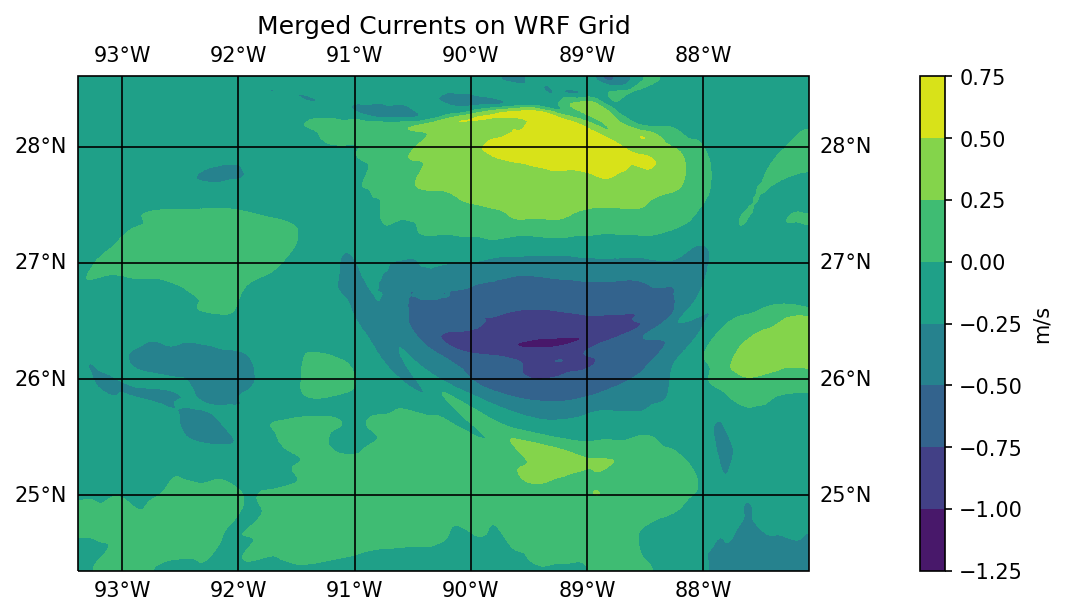

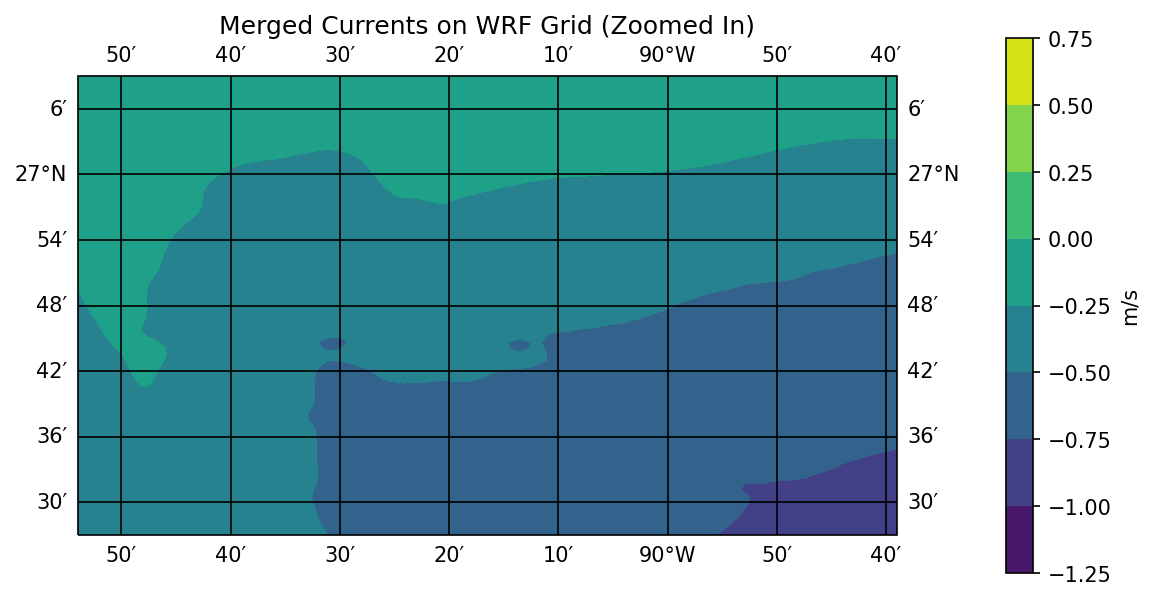

In [11]:
#U25 smooth
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, u25_WRF)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Merged Currents on WRF Grid')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/Swath'
plt.savefig(save_results_to + '1_Merged_U.png', bbox_inches = 'tight',dpi = 150)
plt.show()

#DS DOMAIN ONLY
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-90.9, -89.65, 26.45, 27.15], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, u25_WRF)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Merged Currents on WRF Grid (Zoomed In)')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/Swath'
plt.savefig(save_results_to + '1zoom_Merged_U.png', bbox_inches = 'tight',dpi = 150)
plt.show()

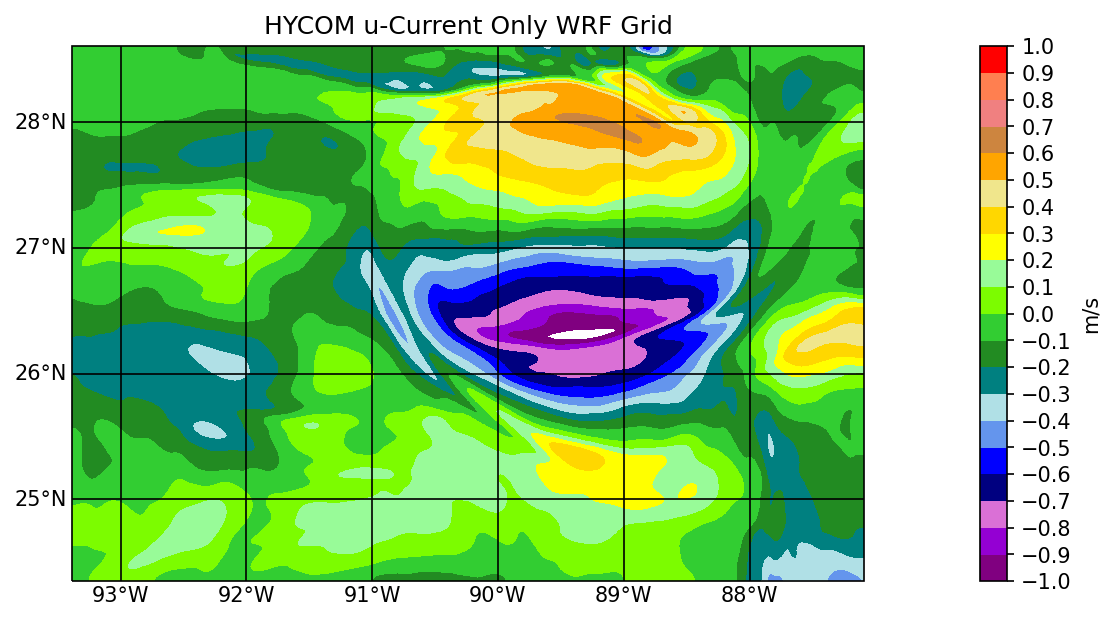

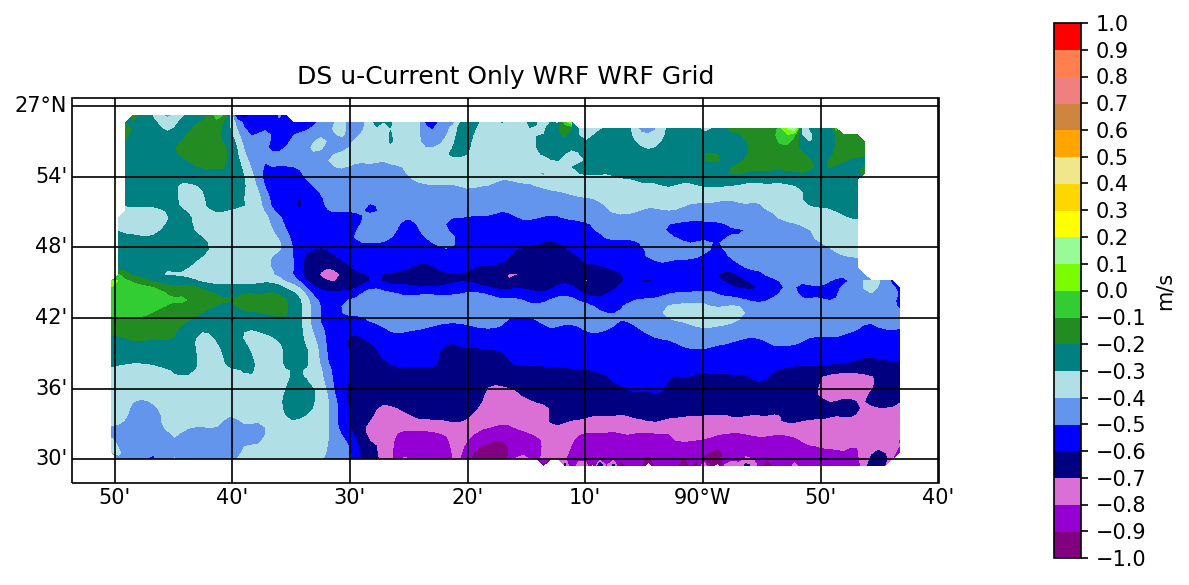

In [15]:
bounds = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
#bounds = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2]

#Smoothed HYCOM only
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, HYCOM_weightedU25, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 
                                                            'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 
                                                            'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad = 0.1, ticks = bounds, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM u-Current Only WRF Grid')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/Swath'
plt.savefig(save_results_to + 'HYCOM_U_Weighted.png', bbox_inches = 'tight',dpi = 150)
plt.show()

#U25 smooth DS
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, DS_weightedU25, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 
                                                            'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 
                                                            'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, ticks = bounds, pad=0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DS u-Current Only WRF WRF Grid')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/Swath'
plt.savefig(save_results_to + 'DS_U_Weighted.png', bbox_inches = 'tight',dpi = 150)
plt.show()

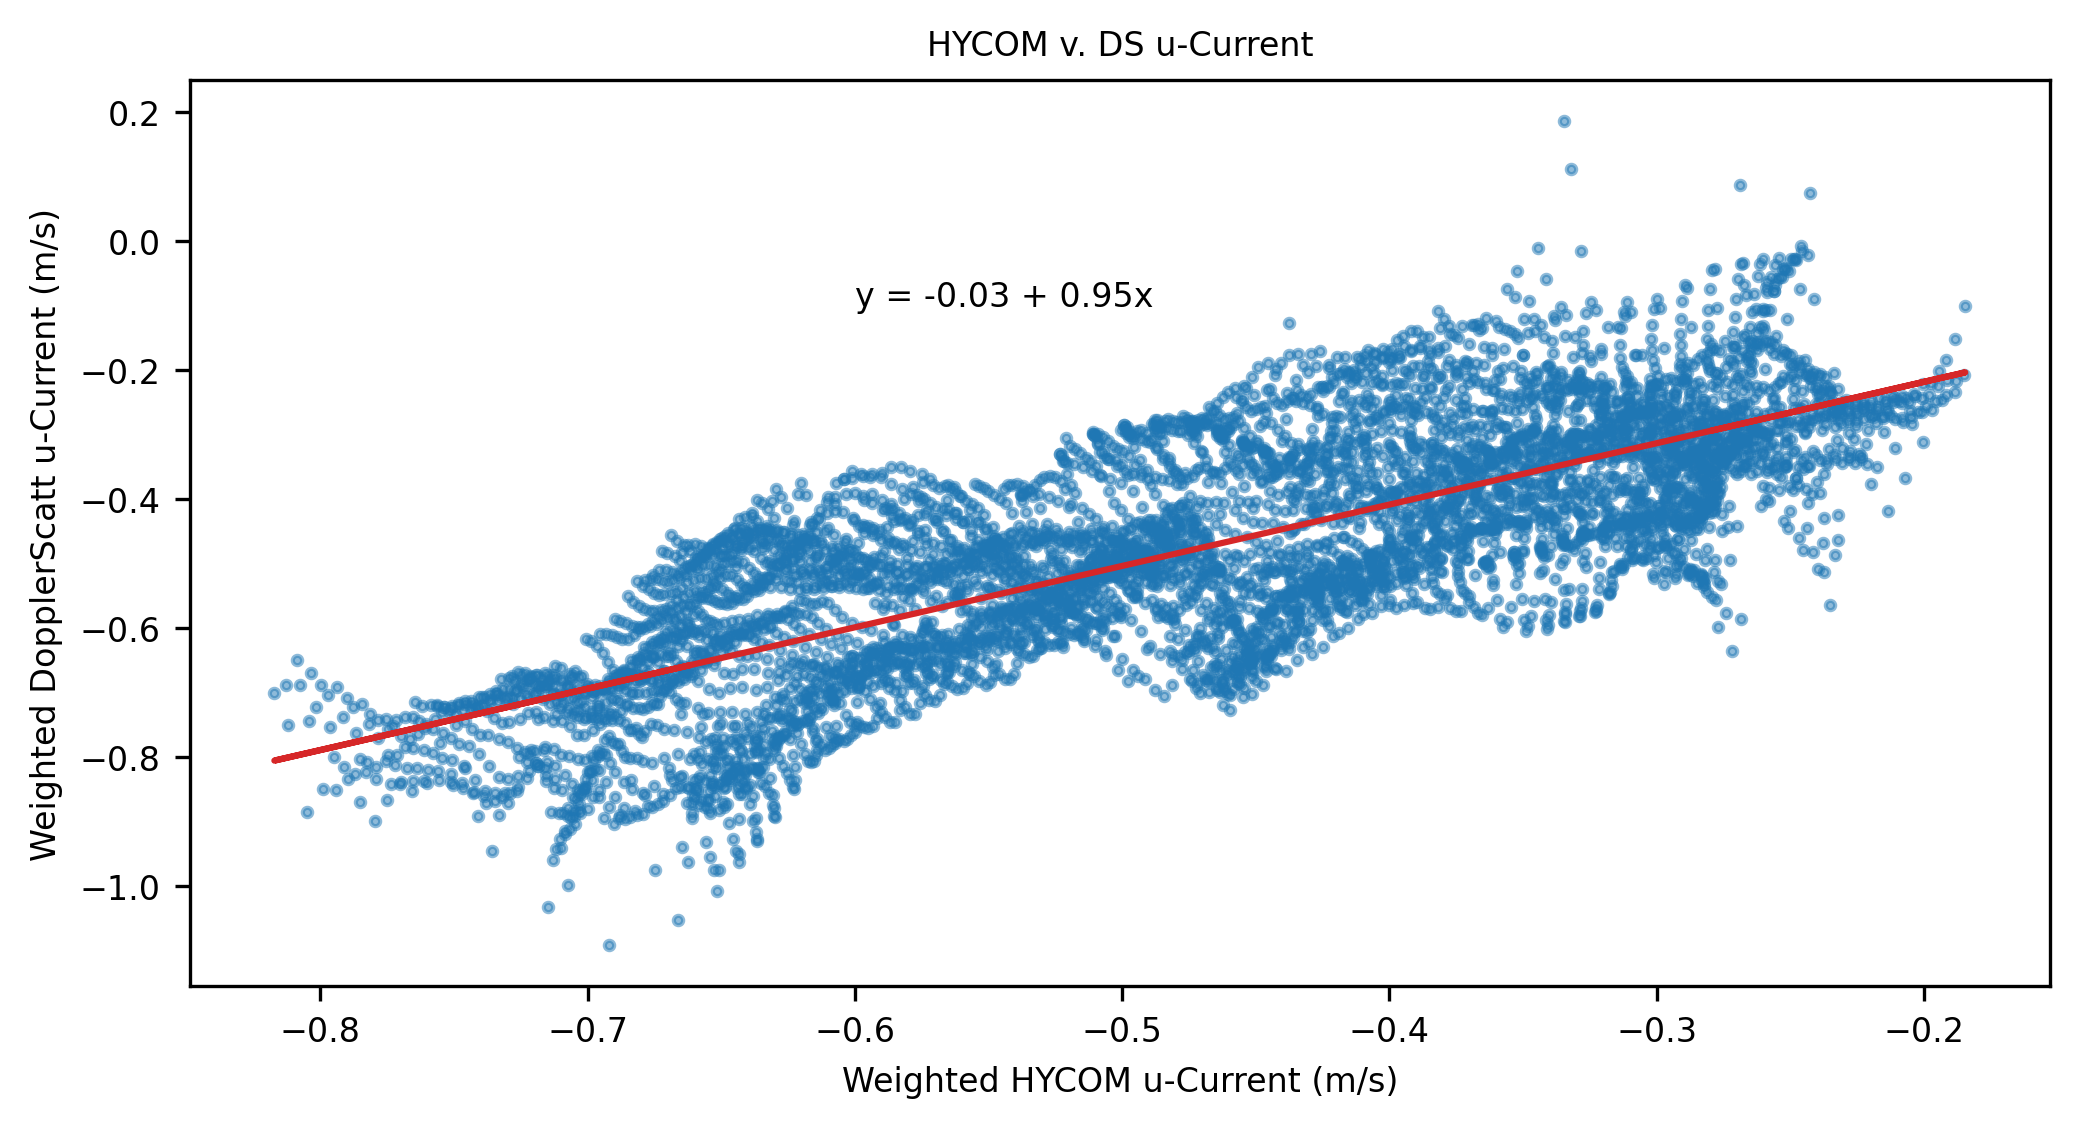

In [16]:
#Scatter for U HYCOM and U DS 

DS25U = DS_weightedU25.flatten() #y, noisier variable on y 
HYCOM25U = HYCOM_weightedU25.flatten() #x 

test_1 = np.where(DS25U > -900)
test_2 = DS25U[test_1]
test_3 = HYCOM25U[test_1]

DS25U = test_2
HYCOM25U = test_3

a, b= np.polyfit(HYCOM25U, DS25U, 1)

SMALL_SIZE = 8
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
figure(figsize=(8,4), dpi=300)
#alpha between 0 and 1, 0=transparent, 1=solid
plt.scatter(HYCOM25U, DS25U, color='tab:blue', alpha=0.50, s=5)

plt.plot(HYCOM25U, a*HYCOM25U+b, color = 'tab:red')
plt.text(-0.6, -0.1, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=8)

plt.title('HYCOM v. DS u-Current')
plt.ylabel('Weighted DopplerScatt u-Current (m/s)')
plt.xlabel('Weighted HYCOM u-Current (m/s)')
#save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
#plt.savefig(save_results_to + '25U_Scatter.png', bbox_inches = 'tight',dpi = 150)
plt.show()

In [10]:
#Gaussian Filter V25
#HYCOM: lat_array (Y), lon_array (X), meanU_25
#DS: goodUarr25_1-10, lat25_1, lon25_1s

HYCOM_lat = lat_array
HYCOM_lon = lon_array

#Define new grid: 1km (1000m)
#match WRF refernce lat/lon, increment by partial degree 
###### !!!!! wrf lat lon NEED TO UPDATE THESE !!!!! ######

#REAL CASE: 
#lat_0 =  24.5
#lat_0 =24.147293
#lon_0 = -93
#lon_0 = -93.42328
#lat_max = 28.5
#lat_max = 28.72953
#lon_max = -87.5
#lon_max = -88.10474
#TEST CASE: DS Domain
#lat_0 =  26.45
#lon_0 = -90.9
#lat_max = 27.15
#lon_max = -89.65 

#TEST CASE mini
#lat_0 =  26.75
#lon_0 = -90.25
#lat_max = 27.25
#lon_max = -89.75 

#REAL RUN 1 
WRF_lat = XLAT[0,:,0]
WRF_lon = XLON[0,0,:]
WRF_latLen = len(WRF_lat)
WRF_lonLen = len(WRF_lon)

#REAL RUN 2 
#WRF_lat = wrf2_lat
#WRF_lon = wrf2_lon
#WRF_latLen = len(WRF_lat)
#WRF_lonLen = len(WRF_lon)


#min, max, then increment and fill lat & then lon (Y=lat, X=lon)
#0.008 degrees = 1km 
#WRF_lat = np.arange(lat_0, lat_max, 0.00898315)
#WRF_lon = np.arange(lon_0, lon_max, 0.00898315)
#WRF_latLen = len(WRF_lat)
#WRF_lonLen = len(WRF_lon)

#make current arrays (u & v) that match lat & lon dimensions, fill with nans 
#u25_WRF  = np.zeros((WRF_latLen, WRF_lonLen))   #(813, 688)
v25_WRF = np.zeros((WRF_latLen, WRF_lonLen))  
#u25_WRF[:] = -999
v25_WRF[:] = -999

DS_weightedV25 = v25_WRF*0
HYCOM_weightedV25= v25_WRF*0

#at equator, 1deg = 111.31949077920639km, so 1km*(1deg/111.31949077920639km) = 0.00898315
#Great Circle Calculator 
#http://edwilliams.org/gccalc.htm

#DS sigma??? = 0.03 # 0.015*2   
km_per_deg= 1/0.00898315
sigma_HYCOM = 0.02 #degrees  0.015*2 #For HYCOM 
sigma_HYCOM_km = sigma_HYCOM*km_per_deg
sigma_DS = 1.0 #0.5-1.0 #km 
#sigma_DS_km = sigma_DS*km_per_deg
sigma_DS_km = sigma_DS


for y in range (0, WRF_latLen):  
    #print(' y :', y)
    for x in range (0, WRF_lonLen):
        #print('x:', x)
        sum_weight_HYCOM = 0
        sum_product_v25HYCOM = 0

        sum_weight_DS25v5 = 0
        sum_product_v25DS5 = 0
        sum_weight_DS25v6 = 0
        sum_product_v25DS6 = 0
        sum_weight_DS25v7 = 0
        sum_product_v25DS7 = 0

        #define area of weighting (lat,lon point +- 3 sigma in lat/lon but round up)
        #+- half size 
        #set bounds in lat/lon
        min_lon = max(WRF_lon[x] - 3*sigma_HYCOM, WRF_lon[0])
        max_lon = min(WRF_lon[x] + 3*sigma_HYCOM, WRF_lon[WRF_lonLen -1])
        min_lat = max(WRF_lat[y] - 3*sigma_HYCOM, WRF_lat[0])   
        max_lat = min(WRF_lat[y] + 3*sigma_HYCOM, WRF_lat[WRF_latLen -1])   
        
        good_lon = [] 
        good_lat = []
        inter_like = []
        
        #HYCOM lat/lon comparison 
        test1_In = np.where(HYCOM_lon >= min_lon)
        test2_In = np.where(HYCOM_lon <= max_lon)
        inter_like_lon = np.intersect1d(test1_In, test2_In)
        
        test1_In = np.where(HYCOM_lat >= min_lat)
        test2_In = np.where(HYCOM_lat <= max_lat)
        inter_like_lat = np.intersect1d(test1_In, test2_In)   
        
        #DS lat/lon comparison

        DS25v5_test1_In = np.where(lon25_5 >= min_lon)
        DS25v5_test2_In = np.where(lon25_5 <= max_lon)
        DS25v5_inter_like_lon = np.intersect1d(DS25v5_test1_In, DS25v5_test2_In)
        DS25v5_test1_In = np.where(lat25_5 >= min_lat)
        DS25v5_test2_In = np.where(lat25_5 <= max_lat)
        DS25v5_inter_like_lat = np.intersect1d(DS25v5_test1_In, DS25v5_test2_In) 
        
        DS25v6_test1_In = np.where(lon25_6 >= min_lon)
        DS25v6_test2_In = np.where(lon25_6 <= max_lon)
        DS25v6_inter_like_lon = np.intersect1d(DS25v6_test1_In, DS25v6_test2_In)
        DS25v6_test1_In = np.where(lat25_6 >= min_lat)
        DS25v6_test2_In = np.where(lat25_6 <= max_lat)
        DS25v6_inter_like_lat = np.intersect1d(DS25v6_test1_In, DS25v6_test2_In) 

        DS25v7_test1_In = np.where(lon25_7 >= min_lon)
        DS25v7_test2_In = np.where(lon25_7 <= max_lon)
        DS25v7_inter_like_lon = np.intersect1d(DS25v7_test1_In, DS25v7_test2_In)
        DS25v7_test1_In = np.where(lat25_7 >= min_lat)
        DS25v7_test2_In = np.where(lat25_7 <= max_lat)
        DS25v7_inter_like_lat = np.intersect1d(DS25v7_test1_In, DS25v7_test2_In)

        #np.where((HYCOM_lon >= min_lon) and (HYCOM_lon <= max_lon), HYCOM_lon)
        #np.where((HYCOM_lat >= min_lat) and (HYCOM_lat <= max_lat))
        
        #HYCOM index
        lon_indices = inter_like_lon
        lat_indices = inter_like_lat
        
        #DS index       
        DS25v5_lon_indices =  DS25v5_inter_like_lon
        DS25v5_lat_indices =  DS25v5_inter_like_lat
        DS25v6_lon_indices =  DS25v6_inter_like_lon
        DS25v6_lat_indices =  DS25v6_inter_like_lat
        DS25v7_lon_indices =  DS25v7_inter_like_lon
        DS25v7_lat_indices =  DS25v7_inter_like_lat
        
        #Good HYCOM index
        good_lon = HYCOM_lon[lon_indices]
        good_lat = HYCOM_lat[lat_indices]    
        
        #Good DS index
        DS25v5_good_lon = lon25_5[DS25v5_lon_indices]
        DS25v5_good_lat = lat25_5[DS25v5_lat_indices] 
        DS25v6_good_lon = lon25_6[DS25v6_lon_indices]
        DS25v6_good_lat = lat25_6[DS25v6_lat_indices] 
        DS25v7_good_lon = lon25_7[DS25v7_lon_indices]
        DS25v7_good_lat = lat25_7[DS25v7_lat_indices] 
    
        #get lengths of good arrays HYCOM 
        good_lon_len = len(good_lon)
        good_lat_len = len(good_lat)
        
        #DS length of food arrays 
        DS25v5_good_lon_len = len(DS25v5_good_lon)
        DS25v5_good_lat_len = len(DS25v5_good_lat) 
        DS25v6_good_lon_len = len(DS25v6_good_lon)
        DS25v6_good_lat_len = len(DS25v6_good_lat)  
        DS25v7_good_lon_len = len(DS25v7_good_lon)
        DS25v7_good_lat_len = len(DS25v7_good_lat)     
        
        #loop through values of good HYCOM arrays 
        for y_small in range(0, good_lat_len):
            for x_small in range(0, good_lon_len):         
                
                #calcualte the distance, 1km  
                #HYCOM distance 
                distance=(km_per_deg)*np.sqrt((good_lat[y_small]-WRF_lat[y])**2+((good_lon[x_small]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #print('distance: ', distance)
                #print('3sigma', 3*sigma_HYCOM)
                #print(y, x, y_small, x_small, distance, good_lat[y_small], WRF_lat[y], good_lon[x_small], WRF_lon[x])
                
                #determine weights- get an array of poitns of the smaller domain
                if distance <= 3 * sigma_HYCOM_km: 
                    #weight_HYCOM = 0.2*(1 / (sigma_HYCOM_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_HYCOM_km**2))
                    weight_HYCOM = 800*(1 / (sigma_HYCOM_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_HYCOM_km**2))
                else: 
                    weight_HYCOM = 0 
                    
                #sum wieghts for HYCOM u & v
                sum_weight_HYCOM = sum_weight_HYCOM + weight_HYCOM
                #print('sum_weight_HYCOM: ', sum_weight_HYCOM)

                #if sum of weights != 0, sum product of weights* current value for HYCOM                         
                sum_product_v25HYCOM = sum_product_v25HYCOM + weight_HYCOM * meanV_25[lat_indices[y_small], lon_indices[x_small]]
                HYCOM_weightedV25[y,x] =  sum_product_v25HYCOM/sum_weight_HYCOM

        for y_small_DS25v5 in range(0, DS25v5_good_lat_len):
            for x_small_DS25v5 in range(0, DS25v5_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25v5_good_lat[y_small_DS25v5]-WRF_lat[y])**2+((DS25v5_good_lon[x_small_DS25v5]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr25_5[DS25v5_lat_indices[y_small_DS25v5], DS25v5_lon_indices[x_small_DS25v5]]): 
                    weight_DS25v5 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25v5 = sum_weight_DS25v5 + weight_DS25v5
                    sum_product_v25DS5 = sum_product_v25DS5 + weight_DS25v5 * goodVarr25_5[DS25v5_lat_indices[y_small_DS25v5], DS25v5_lon_indices[x_small_DS25v5]]
                else: 
                    weight_DS25v5 = 0 
                    
        for y_small_DS25v6 in range(0, DS25v6_good_lat_len):
            for x_small_DS25v6 in range(0, DS25v6_good_lon_len):          
                distance=(km_per_deg)*np.sqrt((DS25v6_good_lat[y_small_DS25v6]-WRF_lat[y])**2+((DS25v6_good_lon[x_small_DS25v6]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr25_6[DS25v6_lat_indices[y_small_DS25v6], DS25v6_lon_indices[x_small_DS25v6]]): 
                    weight_DS25v6 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25v6 = sum_weight_DS25v6 + weight_DS25v6
                    sum_product_v25DS6 = sum_product_v25DS6 + weight_DS25v6 * goodVarr25_6[DS25v6_lat_indices[y_small_DS25v6], DS25v6_lon_indices[x_small_DS25v6]]
                else: 
                    weight_DS25v6 = 0 
                    
        for y_small_DS25v7 in range(0, DS25v7_good_lat_len):
            for x_small_DS25v7 in range(0, DS25v7_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25v7_good_lat[y_small_DS25v7]-WRF_lat[y])**2+((DS25v7_good_lon[x_small_DS25v7]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr25_7[DS25v7_lat_indices[y_small_DS25v7], DS25v7_lon_indices[x_small_DS25v7]]): 
                    weight_DS25v7 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25v7 = sum_weight_DS25v7 + weight_DS25v7
                    sum_product_v25DS7 = sum_product_v25DS7 + weight_DS25v7 * goodVarr25_7[DS25v7_lat_indices[y_small_DS25v7], DS25v7_lon_indices[x_small_DS25v7]]
                else: 
                    weight_DS25v7 = 0 
           
    #outside of loop: sum of products/sum of weights
        DS_weight = (sum_weight_DS25v5 + sum_weight_DS25v6 + sum_weight_DS25v7) #add each DS sum, add ech sum weigth     
        if DS_weight != 0: 
            DS_weightedV25[y,x] =  (sum_product_v25DS5 + sum_product_v25DS6 + sum_product_v25DS7)/(DS_weight) #add each DS sum, add ech sum weigth 
        else: 
            DS_weightedV25[y,x] = -999
                     
        v25_WRF[y,x] = (sum_product_v25HYCOM + sum_product_v25DS5 + sum_product_v25DS6 + sum_product_v25DS7)/(sum_weight_HYCOM + sum_weight_DS25v5 + sum_weight_DS25v6 + sum_weight_DS25v7) #add each DS sum, add ech sum weigth 



In [11]:
print(v25_WRF.shape)
print(WRF_lon.shape)
print(WRF_lat.shape)
print(v25_WRF)
print(DS_weightedV25.shape)
print(HYCOM_weightedV25.shape)

for x in v25_WRF: 
    for y in x: 
        if np.isnan(y):
            print('NaN present')
            
for x in v25_WRF: 
    for y in x: 
        if y == -999:
            print('-999 present')  
print('sigma DS:', sigma_DS)
print('sigma HYCOM', sigma_HYCOM)

(474, 639)
(639,)
(474,)
[[0.86421758 0.86421758 0.86442354 ... 0.94721484 0.94721484 0.94721484]
 [0.86421758 0.86431556 0.86442359 ... 0.94785106 0.94721484 0.94721484]
 [0.86413716 0.86423675 0.86434702 ... 0.94774068 0.94711906 0.94721484]
 ...
 [0.80682278 0.80683526 0.80685814 ... 0.86809943 0.86792558 0.86792558]
 [0.80677201 0.80678861 0.80680485 ... 0.86801113 0.86782245 0.86772943]
 [0.80672622 0.80674678 0.80676678 ... 0.86793198 0.86772943 0.86772943]]
(474, 639)
(474, 639)
sigma DS: 1.0
sigma HYCOM 0.02


C:\Users\Anna\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


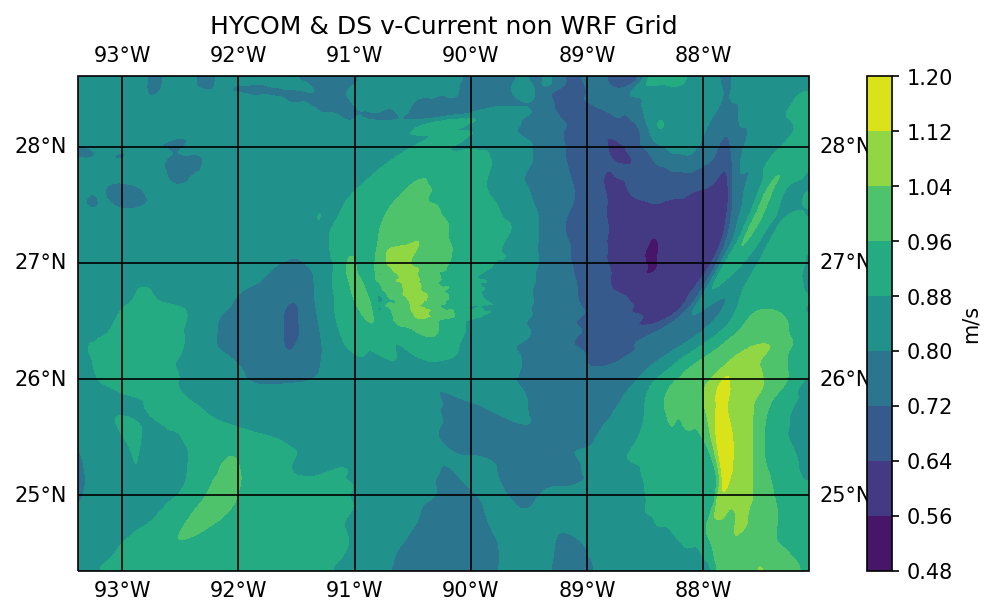

In [12]:

#V25 smooth
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, v25_WRF)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM & DS v-Current non WRF Grid')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/Swath'
plt.savefig(save_results_to + '25V_Weighted.png', bbox_inches = 'tight',dpi = 150)
plt.show()

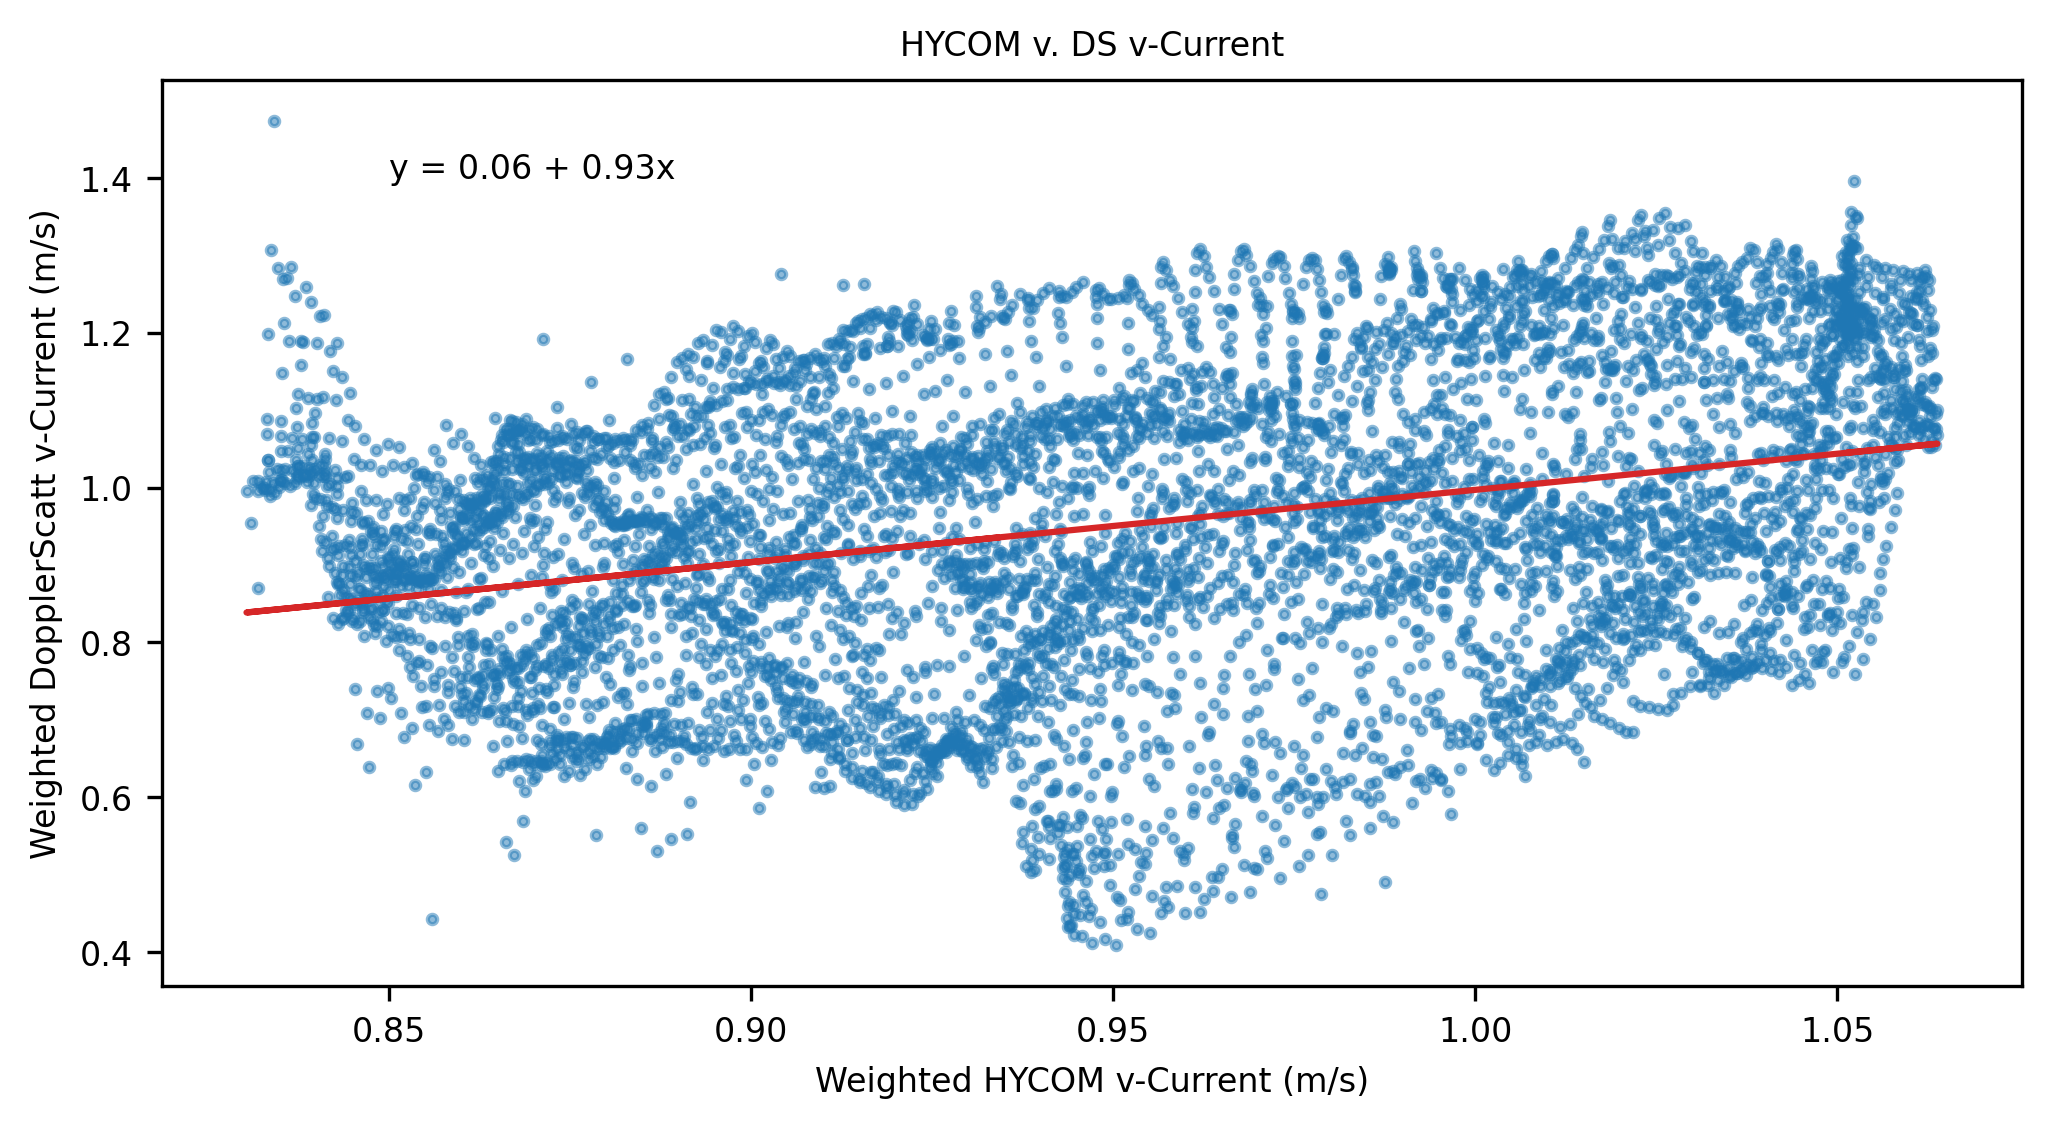

In [18]:
#Scatter for V HYCOM and V DS 

DS25V = DS_weightedV25.flatten() #y, noisier variable on y 
HYCOM25V = HYCOM_weightedV25.flatten() #x 

test_1 = np.where(DS25V!=-999)
test_2 = DS25V[test_1]
test_3 = HYCOM25V[test_1]

DS25V = test_2
HYCOM25V = test_3
a, b = np.polyfit(HYCOM25V, DS25V, 1)

SMALL_SIZE = 8
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
figure(figsize=(8,4), dpi=300)
#alpha between 0 and 1, 0=transparent, 1=solid
plt.scatter(HYCOM25V, DS25V, color='tab:blue', alpha=0.50, s=5)

plt.plot(HYCOM25V, a*HYCOM25V+b, color = 'tab:red')
plt.text(0.85, 1.4, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=8)
plt.title('HYCOM v. DS v-Current')
plt.ylabel('Weighted DopplerScatt v-Current (m/s)')
plt.xlabel('Weighted HYCOM v-Current (m/s)')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/Swath'
plt.savefig(save_results_to + '25V_Scatter.png', bbox_inches = 'tight',dpi = 150)
plt.show()

C:\Users\Anna\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


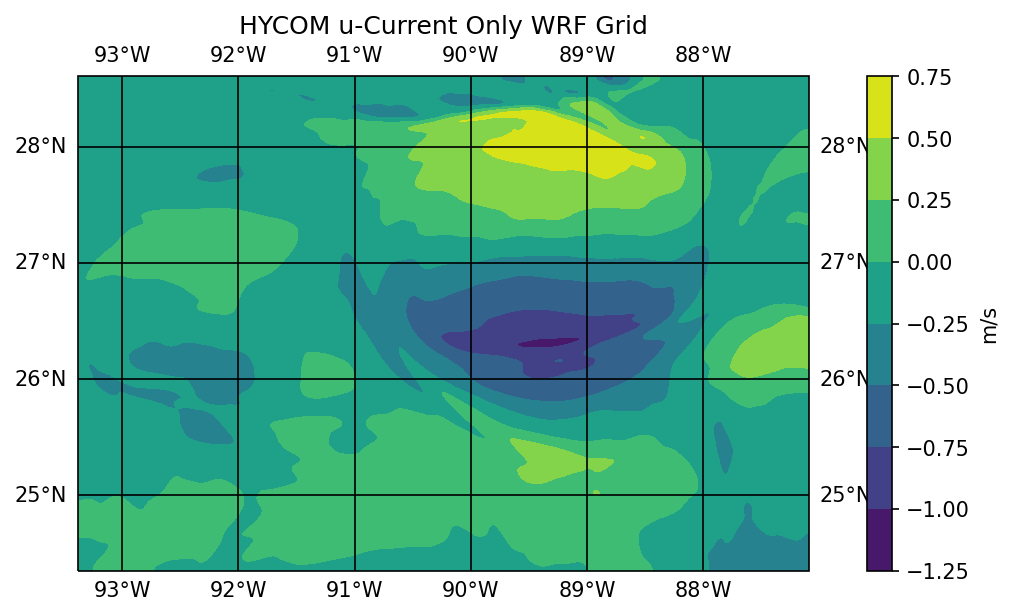

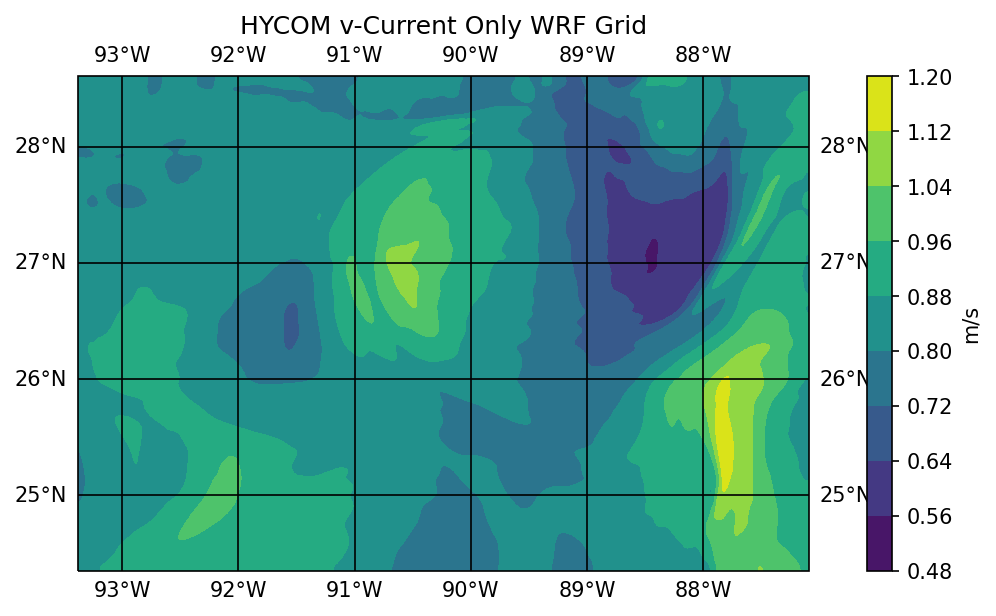

speed25 shape:  (474, 639)


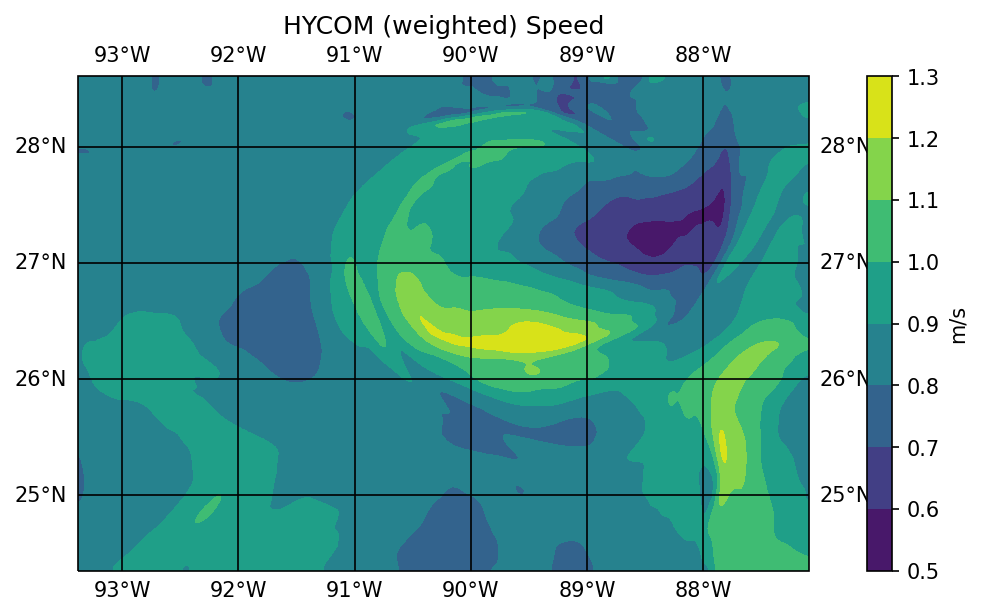

In [12]:
#HYCOM ONLY PLOTS

#Smoothed HYCOM only
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, HYCOM_weightedU25)
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM u-Current Only WRF Grid')
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, HYCOM_weightedV25)
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM v-Current Only WRF Grid')
plt.show()

speed25 = np.sqrt((HYCOM_weightedU25**2)+(HYCOM_weightedV25**2))
print('speed25 shape: ',speed25.shape)

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, speed25)
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM (weighted) Speed')
plt.show()


In [13]:
#HYCOM 

#HYCOM speed
speed_HYCOM = np.sqrt((meanU_25**2)+(meanV_25**2))
print('speed25 shape: ',speed25.shape)

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(HYCOM_lon, HYCOM_lat, speed_HYCOM)
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM (unweighted) Speed')
plt.show()


#HYCOM VECTOR PLOT
HYCOM_lon2D, HYCOM_lat2D = np.meshgrid(HYCOM_lon, HYCOM_lat)
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
PCM=ax.get_children()[2]
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
skip = (slice(None, None, 5), slice(None, None, 5))
plt.quiver(HYCOM_lon2D[skip], HYCOM_lat2D[skip], meanU_25[skip], meanV_25[skip], color = 'red')
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM Only')
plt.show()


NameError: name 'speed25' is not defined

C:\Users\Anna\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


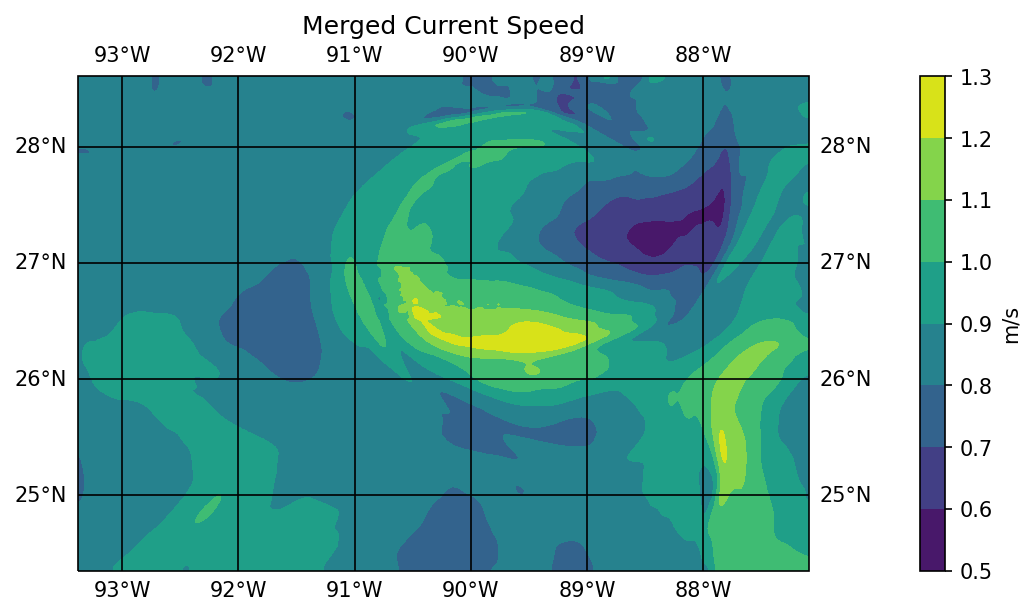

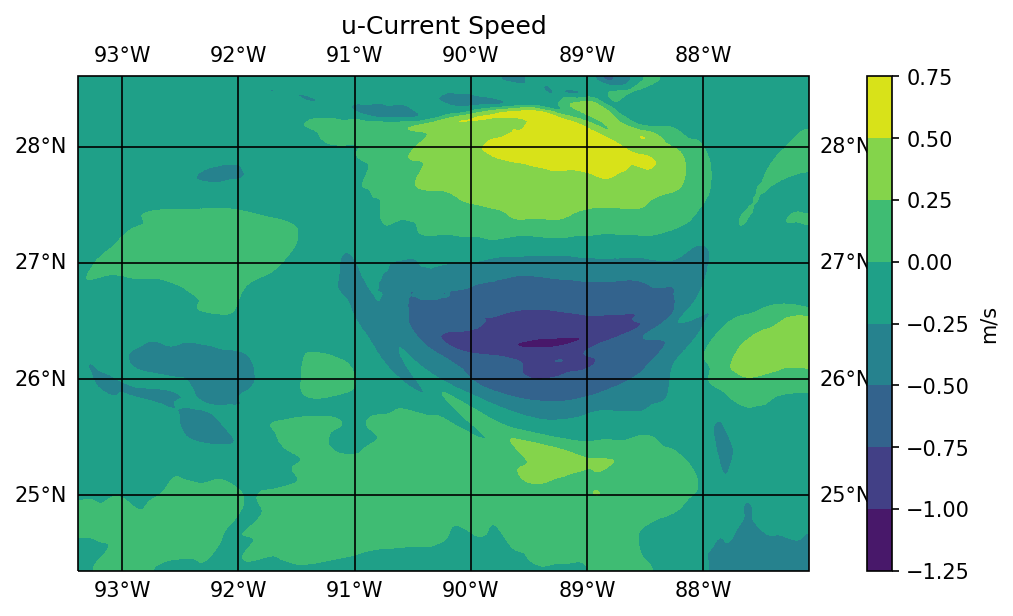

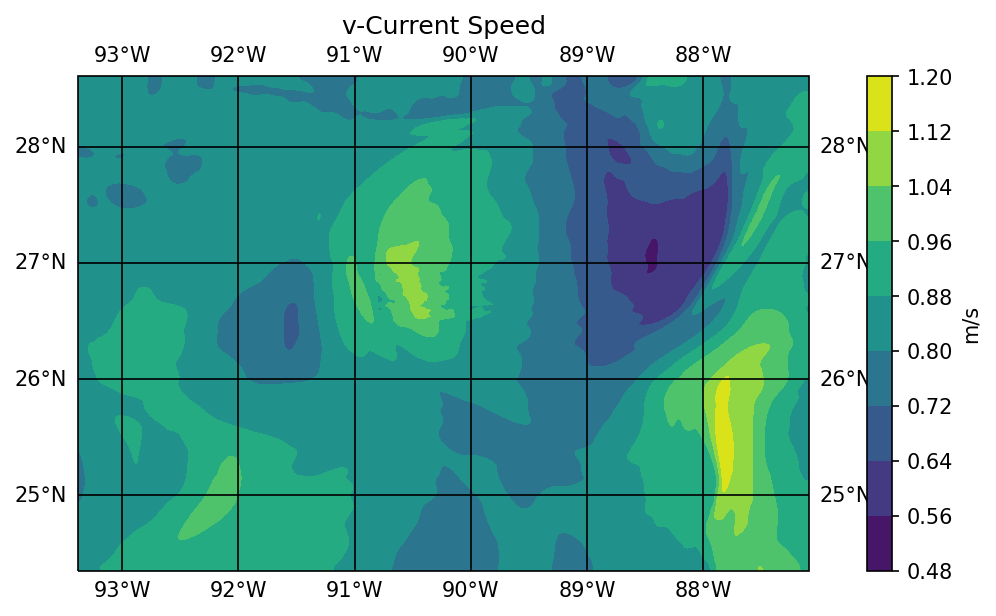

In [13]:

WRF_speed25 = np.sqrt((u25_WRF**2)+(v25_WRF**2))


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, WRF_speed25)
plt.colorbar(cs, ax=ax, pad = 0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Merged Current Speed')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/'
plt.savefig(save_results_to + 'wrfin_currentSpeed.png', bbox_inches = 'tight',dpi = 150)
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, u25_WRF)
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/'
plt.savefig(save_results_to + 'wrfin_UcurrentSpeed.png', bbox_inches = 'tight',dpi = 150)
plt.title('u-Current Speed')
plt.show()

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, v25_WRF)
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/'
plt.savefig(save_results_to + 'wrfin_VcurrentSpeed.png', bbox_inches = 'tight',dpi = 150)
plt.title('v-Current Speed')
plt.show()

In [14]:
#Vorticity ----> WRF currents vorticity
Y = WRF_lat #474
X = WRF_lon #613
U =  u25_WRF #474, 613
V =  v25_WRF #474, 613
print('X: ', X.shape)
print('Y: ', Y.shape)
print('U: ', U.shape)
print('V: ', V.shape)
'''
#get dy & dx
deg2Meter=111100
new_dx=np.zeros((len(X),len(X)))
new_dy=np.zeros((len(Y),len(Y)))
for y in range(len(Y)-1):
    new_dy[:,y]=(Y[y+1]-Y[y])*deg2Meter
for y in range(len(Y)-1):
    latAdjust=np.cos(np.pi*Y[y]/180)
    for x in range(len(X)-1):
        new_dx[y,x]=(X[x+1]-X[x])*deg2Meter*latAdjust
print(new_dx.shape)
print(new_dy.shape)

dudy=np.zeros((len(Y), len(X)))
dvdx=np.zeros((len(Y),len(X)))
print(dudy.shape)
print(dvdx.shape)

#get vorticity/curl 
for y in range(1,len(Y)-1):
    for x in range(1,len(X)-1):
        dudyN=(U[y-1,x]-U[y,x])/((Y[y-1]-Y[y])*deg2Meter)
        dudyS=(U[y,x])-U[y+1,x]/((Y[y]-Y[y+1])*deg2Meter)
        dvdxE=(V[y,x+1]-V[y,x])/((X[x+1]-X[x])*np.cos(np.pi*Y[y]/180)*deg2Meter)
        dvdxW=(V[y,x-1]-V[y,x])/((X[x]-X[x-1])*np.cos(np.pi*Y[y]/180)*deg2Meter)
        
        dudy[y,x]=(dudyN+dudyS)/2
        dvdx[y,x]=(dvdxE+dvdxW)/2
curl=(dvdx-dudy)*(10**-4)
print(curl.shape)
'''
#metpy vort
#Vorticity=curl
dxdy=mpcalc.lat_lon_grid_deltas(longitude=WRF_lon, latitude=WRF_lat, x_dim=- 1, y_dim=- 2, geod=None)
#print(dxdy.shape)
#print(dxdy)

#metpy.calc.vorticity(u, v, *, dx=None, dy=None, x_dim=- 1, y_dim=- 2)  
mp_curl=mpcalc.vorticity(u=u25_WRF*units('m/s'), v=v25_WRF*units('m/s'), dx=dxdy[0], dy=dxdy[1])


X:  (639,)
Y:  (474,)
U:  (474, 639)
V:  (474, 639)


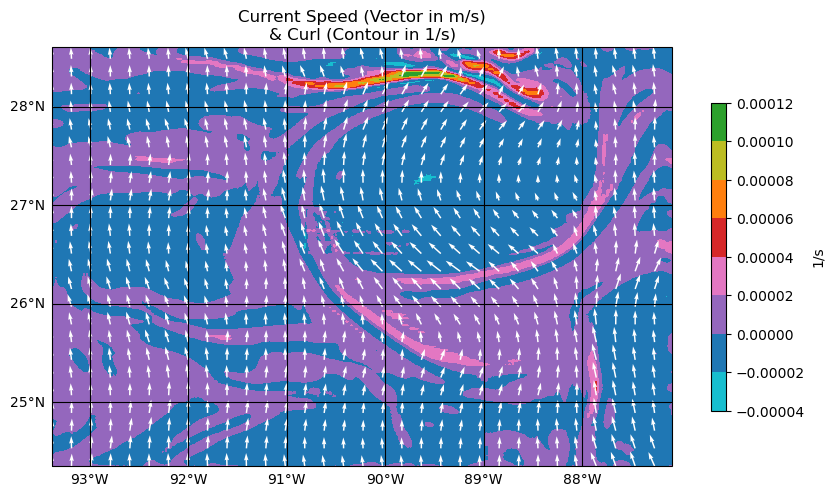

In [15]:
#metpy curl plot 
Y = WRF_lat
X = WRF_lon
U =  u25_WRF
V =  v25_WRF

bounds = [-0.00004, -0.00002, 0, 0.00002, 0.00004, 0.00006, 0.00008, 0.00010, 0.00012]

lon2D, lat2D = np.meshgrid(X, Y)
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#ax.set_extent([-90.9, -89.65, 26.45, 27.15], crs=mapcrs)
ax.coastlines()
#cs = ax.contourf(X, Y, mp_curl, transform=mapcrs, levels = bounds, colors = ['navy', 'mediumblue', 'blue','cornflowerblue', 'powderblue',
#                                                                             'teal', 'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 
#                                                                             'yellow', 'gold', 'orange', 'coral', 'red', 'maroon', 'coral', 
#'                                                                             'red', 'maroon', 'purple', 'darkviolet', 'orchid'])
cs = ax.contourf(X, Y, mp_curl, transform=mapcrs, levels = bounds, colors = ['tab:cyan','tab:blue', 'tab:purple', 'tab:pink', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green'])
CM=ax.get_children()[2]
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
skip = (slice(None, None, 20), slice(None, None, 20))
plt.quiver(lon2D[skip], lat2D[skip], U[skip], V[skip], color = 'white') #lon, lat, u_curent, v_current
plt.colorbar(cs, ax=ax, ticks = bounds, shrink = 0.5, label = '1/s')
gl.top_labels = False
gl.ylabels_right = False
plt.title('Current Speed (Vector in m/s)\n& Curl (Contour in 1/s)')
save_results_to = '/Users/Anna/Desktop/WRF/'
plt.savefig(save_results_to + '25_Vectors.png', bbox_inches = 'tight',dpi = 150)
plt.show()


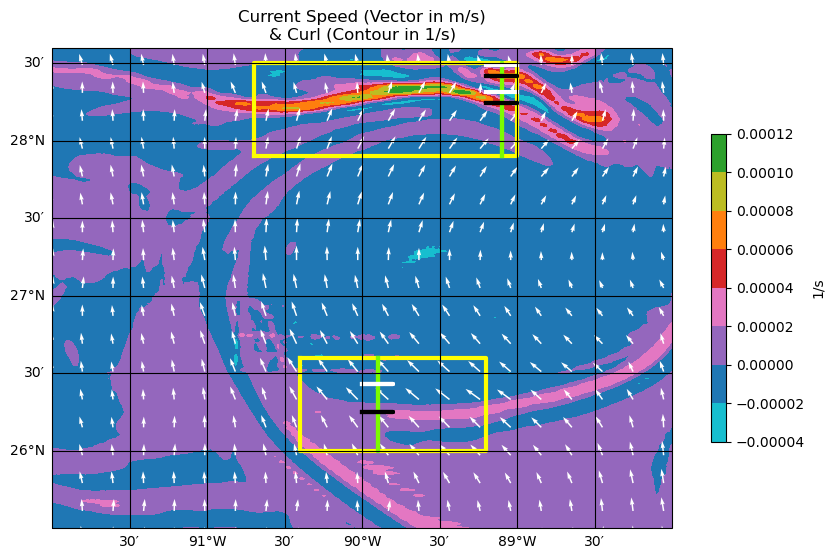

In [47]:

#WITH REGIONS of STUDY
Y = WRF_lat
X = WRF_lon
U =  u25_WRF
V =  v25_WRF

bounds = [-0.00004, -0.00002, 0, 0.00002, 0.00004, 0.00006, 0.00008, 0.00010, 0.00012]
lon2D, lat2D = np.meshgrid(X, Y)
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-92, -88, 25.5, 28.6], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(X, Y, mp_curl, transform=mapcrs, levels = bounds, colors = ['tab:cyan','tab:blue', 'tab:purple', 'tab:pink', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green'])
CM=ax.get_children()[2]
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
skip = (slice(None, None, 20), slice(None, None, 20))
plt.quiver(lon2D[skip], lat2D[skip], U[skip], V[skip], color = 'white') #lon, lat, u_curent, v_current
plt.colorbar(cs, ax=ax, ticks = bounds, shrink = 0.5, label = '1/s')
gl.top_labels = False
gl.ylabels_right = False

#xs = [-93.42328, -88.10474, -88.10474, -93.42328, -93.42328]
xs2 = [-90.7, -89.0, -89.0, -90.7, -90.7]
#ys = [28.72953, 28.72953, 24.147293, 24.147293, 28.72953]
ys2 =  [27.9, 27.9, 28.5, 28.5, 27.9]
ax.plot(xs2, ys2, color="yellow", linewidth=3)

#North Cross Section
xs4 = [-89.1, -89.1, -89.1, -89.1, -89.1]
ys4 =  [27.9, 27.9, 28.5, 28.5, 27.9]
ax.plot(xs4, ys4, color="lawngreen", linewidth=3)

#NorthLINE A
xs7 = [-89.2, -89.0, -89.0, -89.2, -89.2]
ys7 =  [28.417, 28.417, 28.417, 28.417, 28.417]
ax.plot(xs7, ys7, color="black", linewidth=3)
#NorthLINE B
xs7 = [-89.2, -89.0, -89.0, -89.2, -89.2]
ys7 =  [28.242, 28.242, 28.242, 28.242, 28.242]
ax.plot(xs7, ys7, color="black", linewidth=3)


#xs = [-93.42328, -88.10474, -88.10474, -93.42328, -93.42328]
xs1 = [-90.4, -89.2, -89.2, -90.4, -90.4]
#ys = [28.72953, 28.72953, 24.147293, 24.147293, 28.72953]
ys1 = [26.6, 26.6, 26.0, 26.0, 26.6]
ax.plot(xs1, ys1, color="yellow", linewidth=3)

#South Cross Section
xs3 = [-89.9, -89.9, -89.9, -89.9, -89.9]
ys3 = [26.6, 26.6, 26.0, 26.0, 26.6]
ax.plot(xs3, ys3, color="lawngreen", linewidth=3)

#SouthLINE A
xs5 = [-90.0, -89.8, -89.8, -90.0, -90.0]
ys5 = [26.249, 26.249, 26.249, 26.249, 26.249]
ax.plot(xs5, ys5, color="black", linewidth=3)

#ADD  North Min in white
#new northline
xs5 = [-89.0, -89.2, -89.2, -89.2, -89.2]
ys5 = [28.49, 28.49, 28.49, 28.49, 28.49]
ax.plot(xs5, ys5, color="white", linewidth=3)
#new northline
xs7 = [-89.0, -89.2, -89.2, -89.2, -89.2]
ys7 = [28.315, 28.315, 28.315, 28.315, 28.315]
ax.plot(xs7, ys7, color="white", linewidth=3)


#ADD South min in white 
#SouthLINE MIN
xs6 = [-90.0, -89.8, -89.8, -90.0, -90.0]
ys6 = [26.43, 26.43, 26.43, 26.43, 26.43]
ax.plot(xs6, ys6, color="white", linewidth=3)

plt.title('Current Speed (Vector in m/s)\n& Curl (Contour in 1/s)')
save_results_to = '/Users/Anna/Desktop/WRF/Thesis_Plots/'
plt.savefig(save_results_to + '25_Vectors_CrossSectionS.png', bbox_inches = 'tight',dpi = 150)
plt.show()






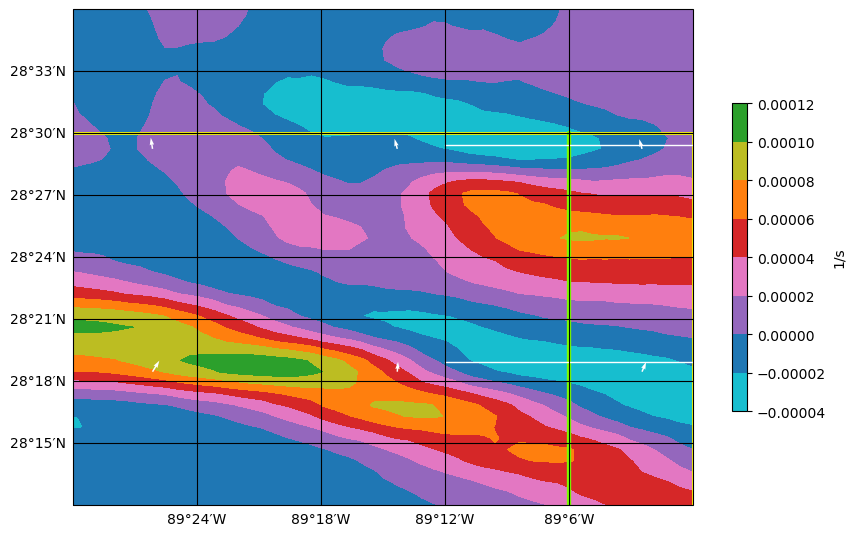

In [45]:
#WITH REGIONS of STUDY
Y = WRF_lat
X = WRF_lon
U =  u25_WRF
V =  v25_WRF

bounds = [-0.00004, -0.00002, 0, 0.00002, 0.00004, 0.00006, 0.00008, 0.00010, 0.00012]
lon2D, lat2D = np.meshgrid(X, Y)
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-89.5, -89.0, 28.2, 28.6], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(X, Y, mp_curl, transform=mapcrs, levels = bounds, colors = ['tab:cyan','tab:blue', 'tab:purple', 'tab:pink', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green'])
CM=ax.get_children()[2]
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
skip = (slice(None, None, 20), slice(None, None, 20))
plt.quiver(lon2D[skip], lat2D[skip], U[skip], V[skip], color = 'white') #lon, lat, u_curent, v_current
plt.colorbar(cs, ax=ax, ticks = bounds, shrink = 0.5, label = '1/s')
gl.top_labels = False
gl.ylabels_right = False

#xs = [-93.42328, -88.10474, -88.10474, -93.42328, -93.42328]
xs2 = [-90.7, -89.0, -89.0, -90.7, -90.7]
#ys = [28.72953, 28.72953, 24.147293, 24.147293, 28.72953]
ys2 =  [27.9, 27.9, 28.5, 28.5, 27.9]
ax.plot(xs2, ys2, color="yellow", linewidth=2)
#North Cross Section
xs4 = [-89.1, -89.1, -89.1, -89.1, -89.1]
ys4 =  [27.9, 27.9, 28.5, 28.5, 27.9]
ax.plot(xs4, ys4, color="lawngreen", linewidth=3)


#new northline
xs5 = [-89.0, -89.2, -89.2, -89.2, -89.2]
ys5 = [28.49, 28.49, 28.49, 28.49, 28.49]
ax.plot(xs5, ys5, color="white", linewidth=1)
#new northline
xs7 = [-89.0, -89.2, -89.2, -89.2, -89.2]
ys7 = [28.315, 28.315, 28.315, 28.315, 28.315]
ax.plot(xs7, ys7, color="white", linewidth=1)

#South Cross Section
#xs3 = [-89.9, -89.9, -89.9, -89.9, -89.9]
#ys3 = [26.6, 26.6, 26.0, 26.0, 26.6]
#ax.plot(xs3, ys3, color="lawngreen", linewidth=3)

#SouthLINE A
#xs5 = [-90.0, -89.8, -89.8, -90.0, -90.0]
#ys5 = [26.249, 26.249, 26.249, 26.249, 26.249]
#ax.plot(xs5, ys5, color="yellow", linewidth=1)

#SouthLINE MIN
#xs5 = [-89.0, -89.8, -89.8, -90.0, -90.0]
#ys5 = [26.43, 26.43, 26.43, 26.43, 26.43]
#ax.plot(xs5, ys5, color="red", linewidth=2)

#plt.title('Current Speed (Vector in m/s)\n& Curl (Contour in 1/s)')
#save_results_to = '/Users/Anna/Desktop/WRF/'
#plt.savefig(save_results_to + '25_Vectors_CrossSectionN.png', bbox_inches = 'tight',dpi = 150)
plt.show()

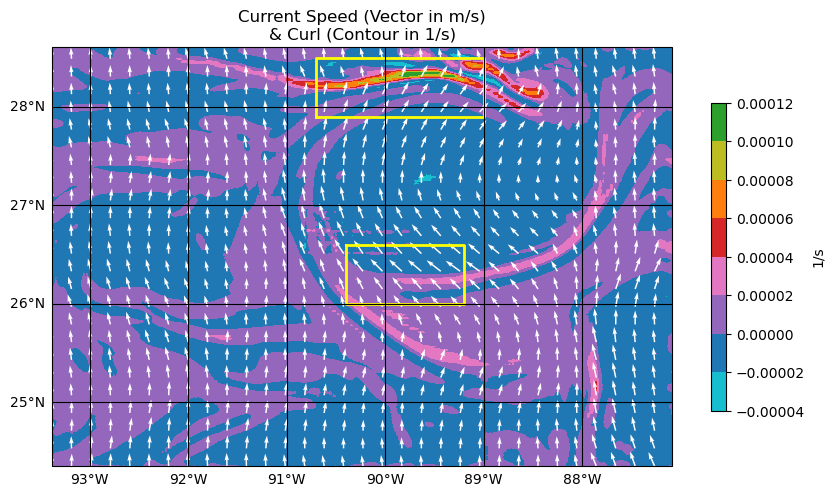

In [33]:

#WITH REGIONS of STUDY
Y = WRF_lat
X = WRF_lon
U =  u25_WRF
V =  v25_WRF

bounds = [-0.00004, -0.00002, 0, 0.00002, 0.00004, 0.00006, 0.00008, 0.00010, 0.00012]
lon2D, lat2D = np.meshgrid(X, Y)
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)

ax.coastlines()
cs = ax.contourf(X, Y, mp_curl, transform=mapcrs, levels = bounds, colors = ['tab:cyan','tab:blue', 'tab:purple', 'tab:pink', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green'])
CM=ax.get_children()[2]
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
skip = (slice(None, None, 20), slice(None, None, 20))
plt.quiver(lon2D[skip], lat2D[skip], U[skip], V[skip], color = 'white') #lon, lat, u_curent, v_current
plt.colorbar(cs, ax=ax, ticks = bounds, shrink = 0.5, label = '1/s')
gl.top_labels = False
gl.ylabels_right = False

#xs = [-93.42328, -88.10474, -88.10474, -93.42328, -93.42328]
xs1 = [-90.4, -89.2, -89.2, -90.4, -90.4]
#ys = [28.72953, 28.72953, 24.147293, 24.147293, 28.72953]
ys1 = [26.6, 26.6, 26.0, 26.0, 26.6]
ax.plot(xs1, ys1, color="yellow", linewidth=2)

#xs = [-93.42328, -88.10474, -88.10474, -93.42328, -93.42328]
xs2 = [-90.7, -89.0, -89.0, -90.7, -90.7]
#ys = [28.72953, 28.72953, 24.147293, 24.147293, 28.72953]
ys2 =  [27.9, 27.9, 28.5, 28.5, 27.9]
ax.plot(xs2, ys2, color="yellow", linewidth=2)

plt.title('Current Speed (Vector in m/s)\n& Curl (Contour in 1/s)')
save_results_to = '/Users/Anna/Desktop/WRF/'
plt.savefig(save_results_to + '25_Vectors_Domain.png', bbox_inches = 'tight',dpi = 150)
plt.show()

In [13]:
#SST in C
HYCOM_lat = lat_array
HYCOM_lon = lon_array

#Define new grid: 1km (1000m)
#match WRF refernce lat/lon, increment by partial degree 
###### !!!!! wrf lat lon NEED TO UPDATE THESE !!!!! ######

#REAL CASE: 
#lat_0 =  24.5
#lat_0 =24.147293
#lon_0 = -93
#lon_0 = -93.42328
#lat_max = 28.5
#lat_max = 28.72953
#lon_max = -87.5
#lon_max = -88.10474

#TEST CASE: DS Domain
#lat_0 =  26.45
#lon_0 = -90.9
#lat_max = 27.15
#lon_max = -89.65 

#TEST CASE mini
#lat_0 =  26.75
#lon_0 = -90.25
#lat_max = 27.25
#lon_max = -89.75 

#REAL RUN 1 
WRF_lat = XLAT[0,:,0]
WRF_lon = XLON[0,0,:]
WRF_latLen = len(WRF_lat)
WRF_lonLen = len(WRF_lon)

#REAL RUN 2 
#WRF_lat = wrf2_lat
#WRF_lon = wrf2_lon
#WRF_latLen = len(WRF_lat)
#WRF_lonLen = len(WRF_lon)

#min, max, then increment and fill lat & then lon (Y=lat, X=lon)
#0.008 degrees = 1km 
#WRF_lat = np.arange(lat_0, lat_max, 0.00898315)
#WRF_lon = np.arange(lon_0, lon_max, 0.00898315)
#WRF_latLen = len(WRF_lat)
#WRF_lonLen = len(WRF_lon)

#make current arrays (u & v) that match lat & lon dimensions, fill with nans 
sst25_WRF  = np.zeros((WRF_latLen, WRF_lonLen))   #(813, 688)
#sst26_WRF = np.zeros((WRF_latLen, WRF_lonLen))  
sst25_WRF[:] = -999
#sst26_WRF[:] = -999

#at equator, 1deg = 111.31949077920639km, so 1km*(1deg/111.31949077920639km) = 0.00898315
#Great Circle Calculator 
#http://edwilliams.org/gccalc.htm

km_per_deg= 1/0.00898315
sigma_HYCOM = 0.02 #degrees  0.015*2 #For HYCOM 
sigma_HYCOM_km = sigma_HYCOM*km_per_deg
sigma_DS = 1.0 #0.5-1.0 #km 
#sigma_DS_km = sigma_DS*km_per_deg
sigma_DS_km = sigma_DS

for y in range (0, WRF_latLen):  
    #print(' y :', y)
    for x in range (0, WRF_lonLen):
        #print('x:', x)
        sum_weight_HYCOM = 0
        sum_product_sst25HYCOM = 0
       
        #define area of weighting (lat,lon point +- 3 sigma in lat/lon but round up)
        #+- half size 
        #set bounds in lat/lon
        min_lon = max(WRF_lon[x] - 3*sigma_HYCOM, WRF_lon[0])
        max_lon = min(WRF_lon[x] + 3*sigma_HYCOM, WRF_lon[WRF_lonLen -1])
        min_lat = max(WRF_lat[y] - 3*sigma_HYCOM, WRF_lat[0])   
        max_lat = min(WRF_lat[y] + 3*sigma_HYCOM, WRF_lat[WRF_latLen -1])       
        
        good_lon = [] 
        good_lat = []
        inter_like = []
        
        #HYCOM lat/lon comparison 
        test1_In = np.where(HYCOM_lon >= min_lon)
        test2_In = np.where(HYCOM_lon <= max_lon)
        inter_like_lon = np.intersect1d(test1_In, test2_In)
        
        test1_In = np.where(HYCOM_lat >= min_lat)
        test2_In = np.where(HYCOM_lat <= max_lat)
        inter_like_lat = np.intersect1d(test1_In, test2_In)   
        
        #HYCOM index
        lon_indices = inter_like_lon
        lat_indices = inter_like_lat
        
        #Good HYCOM index
        good_lon = HYCOM_lon[lon_indices]
        good_lat = HYCOM_lat[lat_indices]    
    
        #get lengths of good arrays HYCOM 
        good_lon_len = len(good_lon)
        good_lat_len = len(good_lat)
            
        #loop through values of good HYCOM arrays 
        for y_small in range(0, good_lat_len):
            for x_small in range(0, good_lon_len):         
                
                #calcualte the distance, 1km  
                #HYCOM distance 
                distance=(km_per_deg)*np.sqrt((good_lat[y_small]-WRF_lat[y])**2+((good_lon[x_small]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                
                #determine weights- get an array of poitns of the smaller domain
                if distance <= 3 * sigma_HYCOM_km: 
                    weight_HYCOM = (1 / (sigma_HYCOM_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_HYCOM_km**2))
                else: 
                    weight_HYCOM = 0 
                    
                #sum wieghts for HYCOM u & v
                sum_weight_HYCOM = sum_weight_HYCOM + weight_HYCOM
                #if sum of weights != 0, sum product of weights* current value for HYCOM                         
                sum_product_sst25HYCOM = sum_product_sst25HYCOM + weight_HYCOM * meanSST_25[lat_indices[y_small], lon_indices[x_small]]
                #sum_product_sst26HYCOM = sum_product_sst26HYCOM + weight_HYCOM * meanSST_26[lat_indices[y_small], lon_indices[x_small]]
                
    #outside of loop: sum of products/sum of weights
        sst25_WRF[y,x] = sum_product_sst25HYCOM/sum_weight_HYCOM
        #sst26_WRF[y,x] = sum_product_sst26HYCOM/sum_weight_HYCOM
        

In [14]:
print(sst25_WRF.shape)
print(WRF_lon.shape)
print(WRF_lat.shape)
print(sst25_WRF)

for x in sst25_WRF: 
    for y in x: 
        if np.isnan(y):
            print('NaN present')
            
for x in sst25_WRF: 
    for y in x: 
        if y == -999:
            print('-999 present')
            

(474, 639)
(639,)
(474,)
[[23.04271507 23.04271507 23.04166452 ... 26.53901482 26.53901482
  26.53901482]
 [23.04271507 23.04221532 23.04166427 ... 26.5391027  26.53901482
  26.53901482]
 [23.04613928 23.04545329 23.0446937  ... 26.53881177 26.53870827
  26.53901482]
 ...
 [21.4909545  21.49154174 21.49268941 ... 23.48037199 23.48715999
  23.48715999]
 [21.48920296 21.48993896 21.4906591  ... 23.48431805 23.49172383
  23.49584007]
 [21.48762321 21.48850197 21.48935683 ... 23.48785522 23.49584007
  23.49584007]]


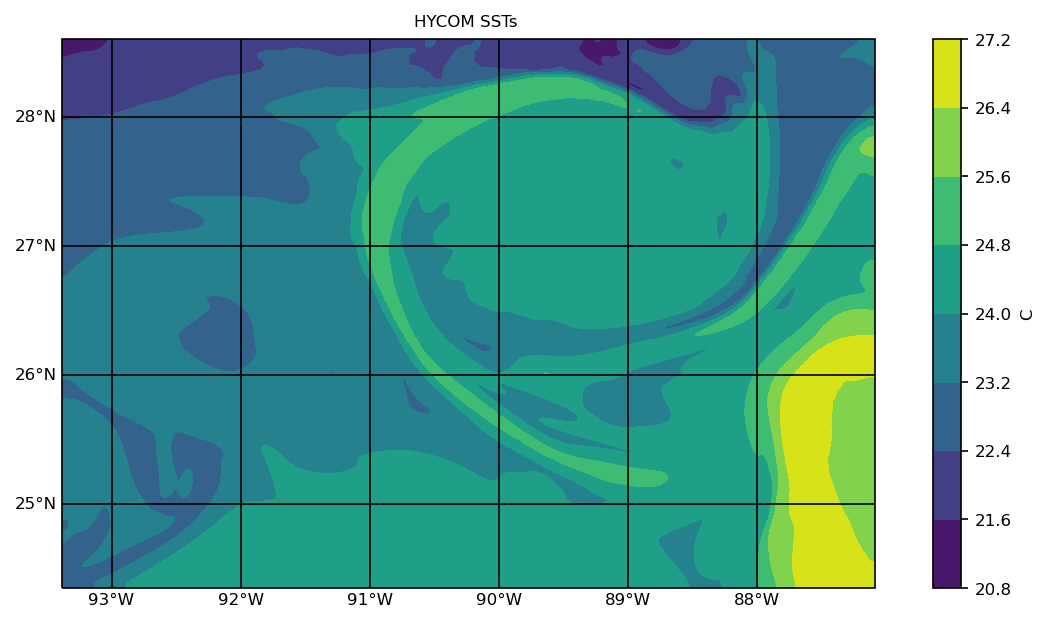

In [26]:
#SST in C smooth 
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, sst25_WRF)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'C')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM SSTs ')
save_results_to = '/Users/Anna/Desktop/WRF/shortRunSST/'
plt.savefig(save_results_to + 'SST_for_wrfinput.png', bbox_inches = 'tight',dpi = 150)
plt.show()

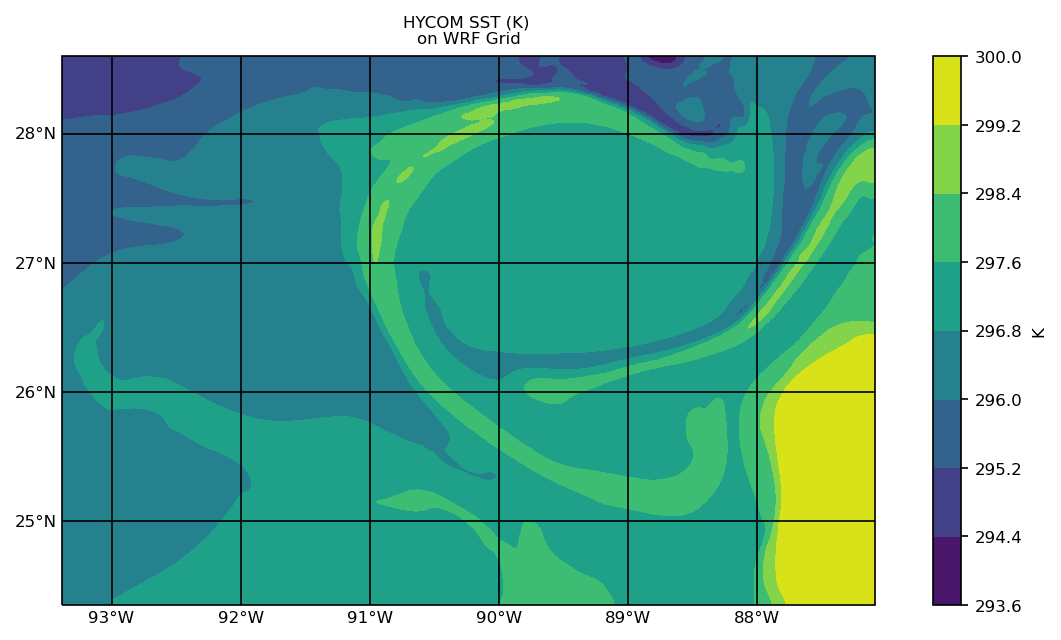

In [27]:
sst25_WRF_K = sst25_WRF+273.15

#SST in C smooth 
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, sst25_WRF_K)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM SST (K) \non WRF Grid')
#save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/Swath'
#plt.savefig(save_results_to + '25V_Weighted.png', bbox_inches = 'tight',dpi = 150)
plt.show()

In [28]:
#rewrite sst only

print('filtered sst: ', sst25_WRF_K.shape)
print('filtered u: ', u25_WRF.shape)
print('filtered v: ', v25_WRF.shape)

#print('wrfin u current shape: ', wrfin1_u.shape)
#print('wrfin v current shape: ', wrfin1_v.shape)
#print('wrfin SST shape: ', wrfin1_sst.shape)

#print('wrfin u current shape: ', wrfin2_u.shape)
#print('wrfin v current shape: ', wrfin2_v.shape)
#print('wrfin SST shape: ', wrfin2_sst.shape)

#WRFIN_D03
#d03 = xr.open_dataset('/Users/Anna/Desktop/WRF/shortRunSST/wrfinput_d03')

filtered sst:  (474, 639)
filtered u:  (474, 639)
filtered v:  (474, 639)


In [30]:
wrfinput_d03.close()  # just to be safe, make sure dataset is not already open.
wrfinput_d03=nc.Dataset('/Users/Anna/Desktop/MSMET/Thesis/wrfinput_d03', mode = 'r+', format='NETCDF4')

print(wrfinput_d03["SST"].shape)
print(wrfinput_d03["SST"][0,:,:])
wrfinput_d03["SST"][0]=sst25_WRF_K
print(wrfinput_d03["SST"].shape)
print(wrfinput_d03["SST"][0,:,:])

print(wrfinput_d03["UOCE"].shape)
print(wrfinput_d03["UOCE"][0,:,:])
wrfinput_d03["UOCE"][0]=u25_WRF
print(wrfinput_d03["UOCE"].shape)
print(wrfinput_d03["UOCE"][0,:,:])

print(wrfinput_d03["VOCE"].shape)
print(wrfinput_d03["VOCE"][0,:,:])
wrfinput_d03["VOCE"][0]=v25_WRF
print(wrfinput_d03["VOCE"].shape)
print(wrfinput_d03["VOCE"][0,:,:])

wrfinput_d03.close()


(1, 474, 639)
[[296.19272 296.19272 296.19165 ... 299.68903 299.68903 299.68903]
 [296.19272 296.19223 296.19165 ... 299.68912 299.68903 299.68903]
 [296.19614 296.19547 296.1947  ... 299.6888  299.68872 299.68903]
 ...
 [294.64096 294.64154 294.6427  ... 296.63037 296.63715 296.63715]
 [294.6392  294.63995 294.64066 ... 296.6343  296.64172 296.64584]
 [294.63763 294.6385  294.63934 ... 296.63785 296.64584 296.64584]]
(1, 474, 639)
[[296.19272 296.19272 296.19165 ... 299.68903 299.68903 299.68903]
 [296.19272 296.19223 296.19165 ... 299.68912 299.68903 299.68903]
 [296.19614 296.19547 296.1947  ... 299.6888  299.68872 299.68903]
 ...
 [294.64096 294.64154 294.6427  ... 296.63037 296.63715 296.63715]
 [294.6392  294.63995 294.64066 ... 296.6343  296.64172 296.64584]
 [294.63763 294.6385  294.63934 ... 296.63785 296.64584 296.64584]]
(1, 474, 639)
[[-0.03676818 -0.03676818 -0.03462522 ... -0.39933854 -0.39933854
  -0.39933854]
 [-0.03676818 -0.03574877 -0.03462471 ... -0.40015855 -0.3993

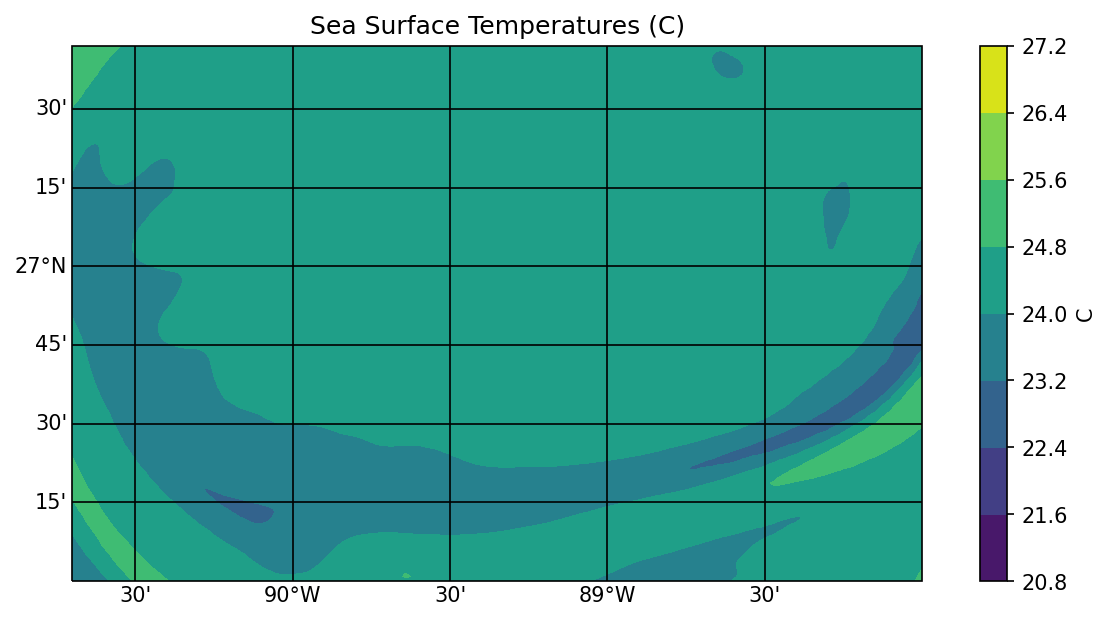

In [24]:
#plot SST 26-27.70 & 88-90.7 

sst25_WRF_K = sst25_WRF

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-90.7, -88.0, 26.0, 27.7], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, sst25_WRF_K)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'C')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Sea Surface Temperatures (C)')
save_results_to = '/Users/Anna/Desktop/WRF/WeatherSummary/'
plt.savefig(save_results_to + 'SST_SmallGrid.png', bbox_inches = 'tight',dpi = 150)
plt.show()

In [23]:
#current speed

Y = WRF_lat
X = WRF_lon
U =  u25_WRF
V =  v25_WRF

current_speed = np.sqrt((U**2)+(V**2))

lon2D, lat2D = np.meshgrid(X, Y)


<ipython-input-25-6154e2a5e596>:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


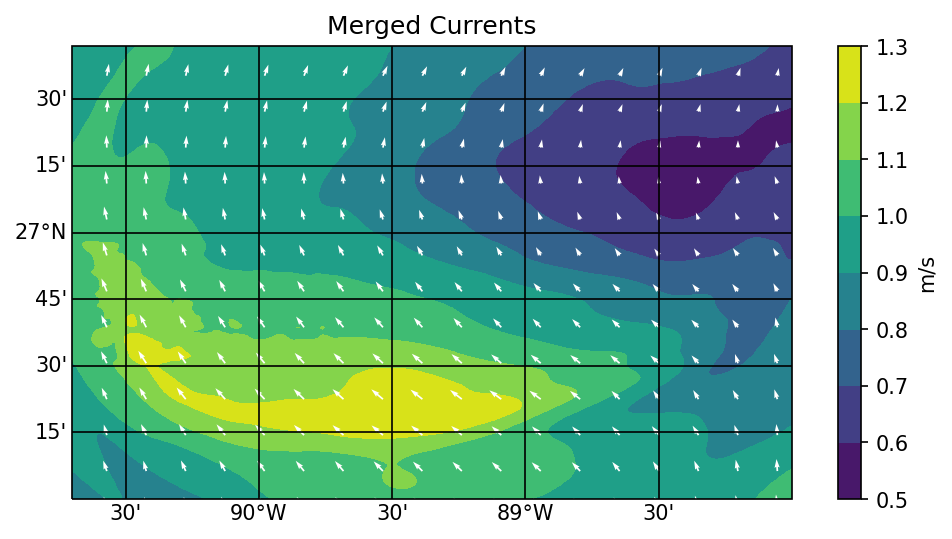

In [25]:
#plot currents 26-27.70 & 88-90.7 w/ vectors 

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-90.7, -88.0, 26.0, 27.7], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, current_speed)


skip = (slice(None, None, 15), slice(None, None, 15))
plt.quiver(lon2D[skip], lat2D[skip], U[skip], V[skip], color = 'white') #lon, lat, u_curent, v_current

PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Merged Currents')
save_results_to = '/Users/Anna/Desktop/WRF/WeatherSummary/'
plt.savefig(save_results_to + 'Currents_SmallGrid.png', bbox_inches = 'tight',dpi = 150)
plt.show()